In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

In [ ]:
#define Paths and fileNames
model_name = 'titanTS'
cutoff_kind = '3'

### Reading Data

In [ ]:
file = open(f'/nfshome/winkelmann/ARL/save/{model_name}TS_data/cutoffs_{cutoff_kind}_{model_name}_fit','r') #edit for plotting over right cutoff
file.readline()
lines = file.readlines()
file.close()
fit_methods = ['ardr-lambda', 'ardr-lineScan', 'rfe', 'lasso', 'least-squares', 'bayesian-ridge', 'elasticnet', 'omp', 'ridge', 'split-bregman']
data = {}
for fit_method in fit_methods:
    data[fit_method] = {'cutoff':[],'validation':[],'train':[],'BIC':[],'number':[],'nonzero':[]}
    
for line in lines:
    line = line.replace(' ', '')
    values = line.split(',')
    if len(line) > 8:
        print(values[8] + ',' + str(values[0:8]))
        continue
    data[values[0]]['cutoff'].append(float(values[1]))
    data[values[0]]['validation'].append(float(values[2]))
    data[values[0]]['train'].append(float(values[3]))
    data[values[0]]['BIC'].append(float(values[4]))
    data[values[0]]['number'].append(float(values[5]))
    data[values[0]]['nonzero'].append(float(values[6]))

FileNotFoundError: [Errno 2] No such file or directory: '/nfshome/winkelmann/ARL/save/anchorTS_data/cutoffs_3_anchor_fit'

In [6]:
#for files with all cutoffs
file = open(f'/nfshome/winkelmann/ARL/save/{model_name}_data/cutoffs_{cutoff_kind}_{model_name}_fitting_data', 'r')  #edit for plotting over right cutoff
file.readline()
lines = file.readlines()
file.close()
fit_methods = ['ardr-lambda', 'ardr-lineScan', 'rfe', 'lasso', 'least-squares', 'bayesian-ridge', 'elasticnet', 'omp',
            'ridge', 'split-bregman']
data = {}
lower_cutoff_groups = []
for line in lines:
    line = line.replace(' ', '').replace('\t','')
    line = line.split(',')
    if not line[1] in lower_cutoff_groups:
        lower_cutoff_groups.append(line[1])

for fit_method in fit_methods:
    data[fit_method] = {'cutoff': [], 'validation': [], 'train': [], 'BIC': [], 'number': [], 'nonzero': []}

for line in lines:
    line = line.replace(' ', '').replace('\t','').replace('\n','')
    line = line.split(',')
    if len(line) > 12:
        print(line[12] + ',' + str(line[0:12]))
        continue
    data[line[0]]['cutoff'].append(float(line[4]))
    data[line[0]]['validation'].append(float(line[5]))
    data[line[0]]['train'].append(float(line[6]))
    data[line[0]]['BIC'].append(float(line[7]))
    data[line[0]]['number'].append(float(line[8]))
    data[line[0]]['nonzero'].append(float(line[9]))




In [4]:
def read_data(model_name, cutoff_kind, algorithm):    
    #for files with all cutoffs
    file = open(f'/nfshome/winkelmann/ARL/save/{model_name}_data/cutoffs_{cutoff_kind}_{model_name}_fitting_data', 'r')  #edit for plotting over right cutoff
    file.readline()
    lines = file.readlines()
    file.close()
    data = {'cutoff': [], 'validation': [], 'train': [], 'BIC': [], 'number': [], 'nonzero': []}

    for line in lines:
        line = line.replace(' ', '').replace('\t','').replace('\n','')
        line = line.split(',')
        if line[0] != algorithm:
            continue
        if len(line) > 12:
            print(line[12] + ',' + str(line[0:12]))
            continue
        if len(line) > 8:
            data['cutoff'].append(float(line[4]))
            data['validation'].append(float(line[5]))
            data['train'].append(float(line[6]))
            data['BIC'].append(float(line[7]))
            data['number'].append(float(line[8]))
            data['nonzero'].append(float(line[9]))
            continue
        data['cutoff'].append(float(line[1]))
        data['validation'].append(float(line[2]))
        data['train'].append(float(line[3]))
        data['BIC'].append(float(line[4]))
        data['number'].append(float(line[5]))
        data['nonzero'].append(float(line[6]))
    return data

models = ['noTS', 'explicitTS', 'anchorTS']
cutoff_kind = '2'
algorithm = 'ardr-lineScan'
all_data = pd.DataFrame()
for model in models:
    df = pd.DataFrame(read_data(model, cutoff_kind, algorithm))
    df['model'] = model
    all_data = pd.concat([all_data, df])

# Convert units tom meV/atom
conv = 1000
all_data['validation'] = all_data['validation'] * conv
all_data['train'] = all_data['train'] * conv
print(all_data)
    

    cutoff  validation     train           BIC  number  nonzero       model
0     2.84    5.288399  5.066125  -9294.802745     3.0      3.0        noTS
1     2.85    5.288399  5.066125  -9294.802745     3.0      3.0        noTS
2     4.93    5.195155  5.000206  -9311.879307     4.0      4.0        noTS
3     5.00    5.185614  4.950523  -9321.694299     5.0      5.0        noTS
4     5.69    4.552534  4.197670  -9598.804085     6.0      6.0        noTS
5     5.75    4.022004  3.806511  -9769.778085     7.0      7.0        noTS
6     6.42    4.023089  3.806352  -9763.006849     8.0      8.0        noTS
7     7.53    4.018980  3.782592  -9760.087114    10.0     10.0        noTS
8     7.57    4.018980  3.782592  -9760.087114    10.0     10.0        noTS
9     8.09    3.335875  3.070256 -10119.337186    11.0     11.0        noTS
10    8.53    3.265382  3.024492 -10133.791398    13.0     13.0        noTS
11    8.57    3.265382  3.024492 -10133.791398    13.0     13.0        noTS
12    9.47  

In [7]:
#for files with diffrent lower cutoffs
file = open('/nfshome/winkelmann/ARL/save/titanTS_data/cutoffs_4_jochen_fit', 'r')  #edit for plotting over right cutoff
file.readline()
lines = file.readlines()
file.close()
fit_methods = ['ardr-lambda', 'ardr-lineScan', 'rfe', 'lasso', 'least-squares', 'bayesian-ridge', 'elasticnet', 'omp',
               'ridge', 'split-bregman']
data = {}

lower_cutoff_groups = []
for line in lines:
    line = line.replace(' ', '').replace('\t','')
    line = line.split(',')
    if not line[1] in lower_cutoff_groups:
        lower_cutoff_groups.append(line[1])


for cutoff_group in lower_cutoff_groups:
    data[cutoff_group] = {}
    for fit_method in fit_methods:
        data[cutoff_group][fit_method] = {'cutoff': [], 'validation': [], 'train': [], 'BIC': [], 'number': [], 'nonzero': []}

for line in lines:
    line = line.replace(' ', '').replace('\t','').replace('\n','')
    line = line.split(',')
    if len(line) > 12:
        print(line[12] + ',' + str(line[0:12]))
        continue
    data[line[1]][line[0]]['cutoff'].append(float(line[2]))
    data[line[1]][line[0]]['validation'].append(float(line[3]))
    data[line[1]][line[0]]['train'].append(float(line[4]))
    data[line[1]][line[0]]['BIC'].append(float(line[5]))
    data[line[1]][line[0]]['number'].append(float(line[6]))
    data[line[1]][line[0]]['nonzero'].append(float(line[7]))

### as PDF

In [ ]:
pdf = PdfPages(f'/nfshome/winkelmann/ARL/save/{model_name}_data/cutoff_{cutoff_group}_{model_name}_plot.pdf')
conv = 1000

for fit_method in fit_methods:
    df = pd.DataFrame(data[fit_method])

    fig, axes = plt.subplots(figsize=(4, 5.2), dpi=120, sharex=True, nrows=3)

    fig.suptitle('%s min at: %s with RMSE: %.4s' %(fit_method, df.cutoff[df.validation.idxmin()], df.validation.min()*conv))

    ax = axes[0]
    ax.plot(df.cutoff, conv * df.validation, '-o', label='validation')
    ax.plot(df.cutoff, conv * df.train, '--s', label='train')
    ax.set_ylabel(r'RMSE ($\frac{meV}{atom}$)')
    ax.set_xlabel('cutoff (Å)')
    ax.legend()

    ax = axes[1]
    ax.plot(df.cutoff, 1e-3 * df.BIC, '-o')
    ax.set_ylabel(r'BIC ($\times 10^{3}$)')

    ax = axes[2]
    ax.plot(df.cutoff, df.number, '--s', label='Total')
    ax.plot(df.cutoff, df.nonzero, '-o', label='Nonzero')
    ax.set_xlabel('2nd order cutoff (Å)')
    ax.set_ylabel('Number of parameters')
    ax.legend()

    fig.tight_layout()
    fig.subplots_adjust(hspace=0)
    fig.align_ylabels(axes)
    pdf.savefig(figure=fig, bbox_inches='tight')
pdf.close()

In [ ]:
#with cutoff subgroups
pdf = PdfPages('/nfshome/winkelmann/ARL/tmp/comparing_cutoff_quartett_jochen.pdf')
conv = 1000

for fit_method in fit_methods:
    for cutoff_group in lower_cutoff_groups:
        df = pd.DataFrame(data[cutoff_group][fit_method])
        
        fig, axes = plt.subplots(figsize=(4, 5.2), dpi=120, sharex=True, nrows=3)
        
        fig.suptitle('%s with %s as cutoff 3; min at: %s with %s' %(fit_method, cutoff_group, df.cutoff[df.validation.idxmin()], df.validation.min() * conv))
        
        ax = axes[0]
        ax.plot(df.cutoff, conv * df.validation, '-o', label='validation')
        ax.plot(df.cutoff, conv * df.train, '--s', label='train')
        ax.set_ylabel(r'RMSE ($\frac{meV}{atom}$)')
    ax.set_xlabel('cutoff (Å)')
        ax.legend()
        
        ax = axes[1]
        ax.plot(df.cutoff, 1e-3 * df.BIC, '-o')
        ax.set_ylabel(r'BIC ($\times 10^{3}$)')
        
        ax = axes[2]
        ax.plot(df.cutoff, df.number, '--s', label='Total')
        ax.plot(df.cutoff, df.nonzero, '-o', label='Nonzero')
        ax.set_xlabel('2nd order cutoff (Å)')
        ax.set_ylabel('Number of parameters')
        ax.legend()
        
        fig.tight_layout()
        fig.subplots_adjust(hspace=0)
        fig.align_ylabels(axes)
        
        pdf.savefig(figure=fig, bbox_inches='tight')
pdf.close()

### for PNG's

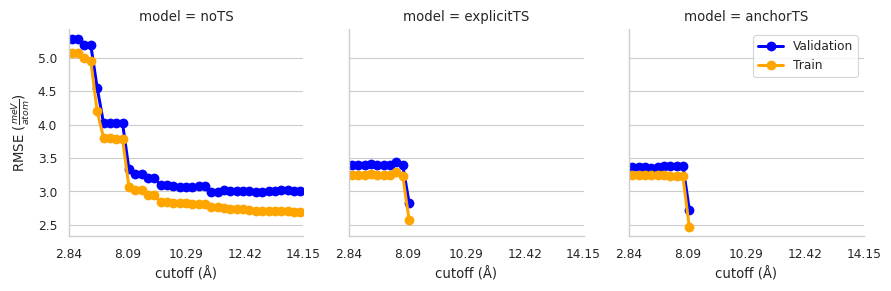

In [25]:
sns.set_theme(style="whitegrid", context='paper')
graphic = sns.FacetGrid(all_data, col="model", sharey=True, sharex=True)
graphic.map(sns.pointplot, "cutoff", "validation", marker="o", color='blue', order=all_data['cutoff'].sort_values().unique(), label='Validation')
graphic.map(sns.pointplot, "cutoff", "train", marker="o", color='orange', order=all_data['cutoff'].sort_values().unique(), label='Train')
for ax in graphic.axes.flat:
    # Get current x-axis limits
    x_min, x_max = ax.get_xlim()
    # Create 5 evenly spaced ticks
    ax.set_xticks(np.linspace(x_min, x_max, 5))
graphic.set_axis_labels("cutoff (Å)", r"RMSE ($\frac{meV}{atom}$)")
plt.legend()
plt.tight_layout()
graphic.savefig(f'/nfshome/winkelmann/ARL/save/cutoff_comparison_{algorithm}.png', bbox_inches='tight')


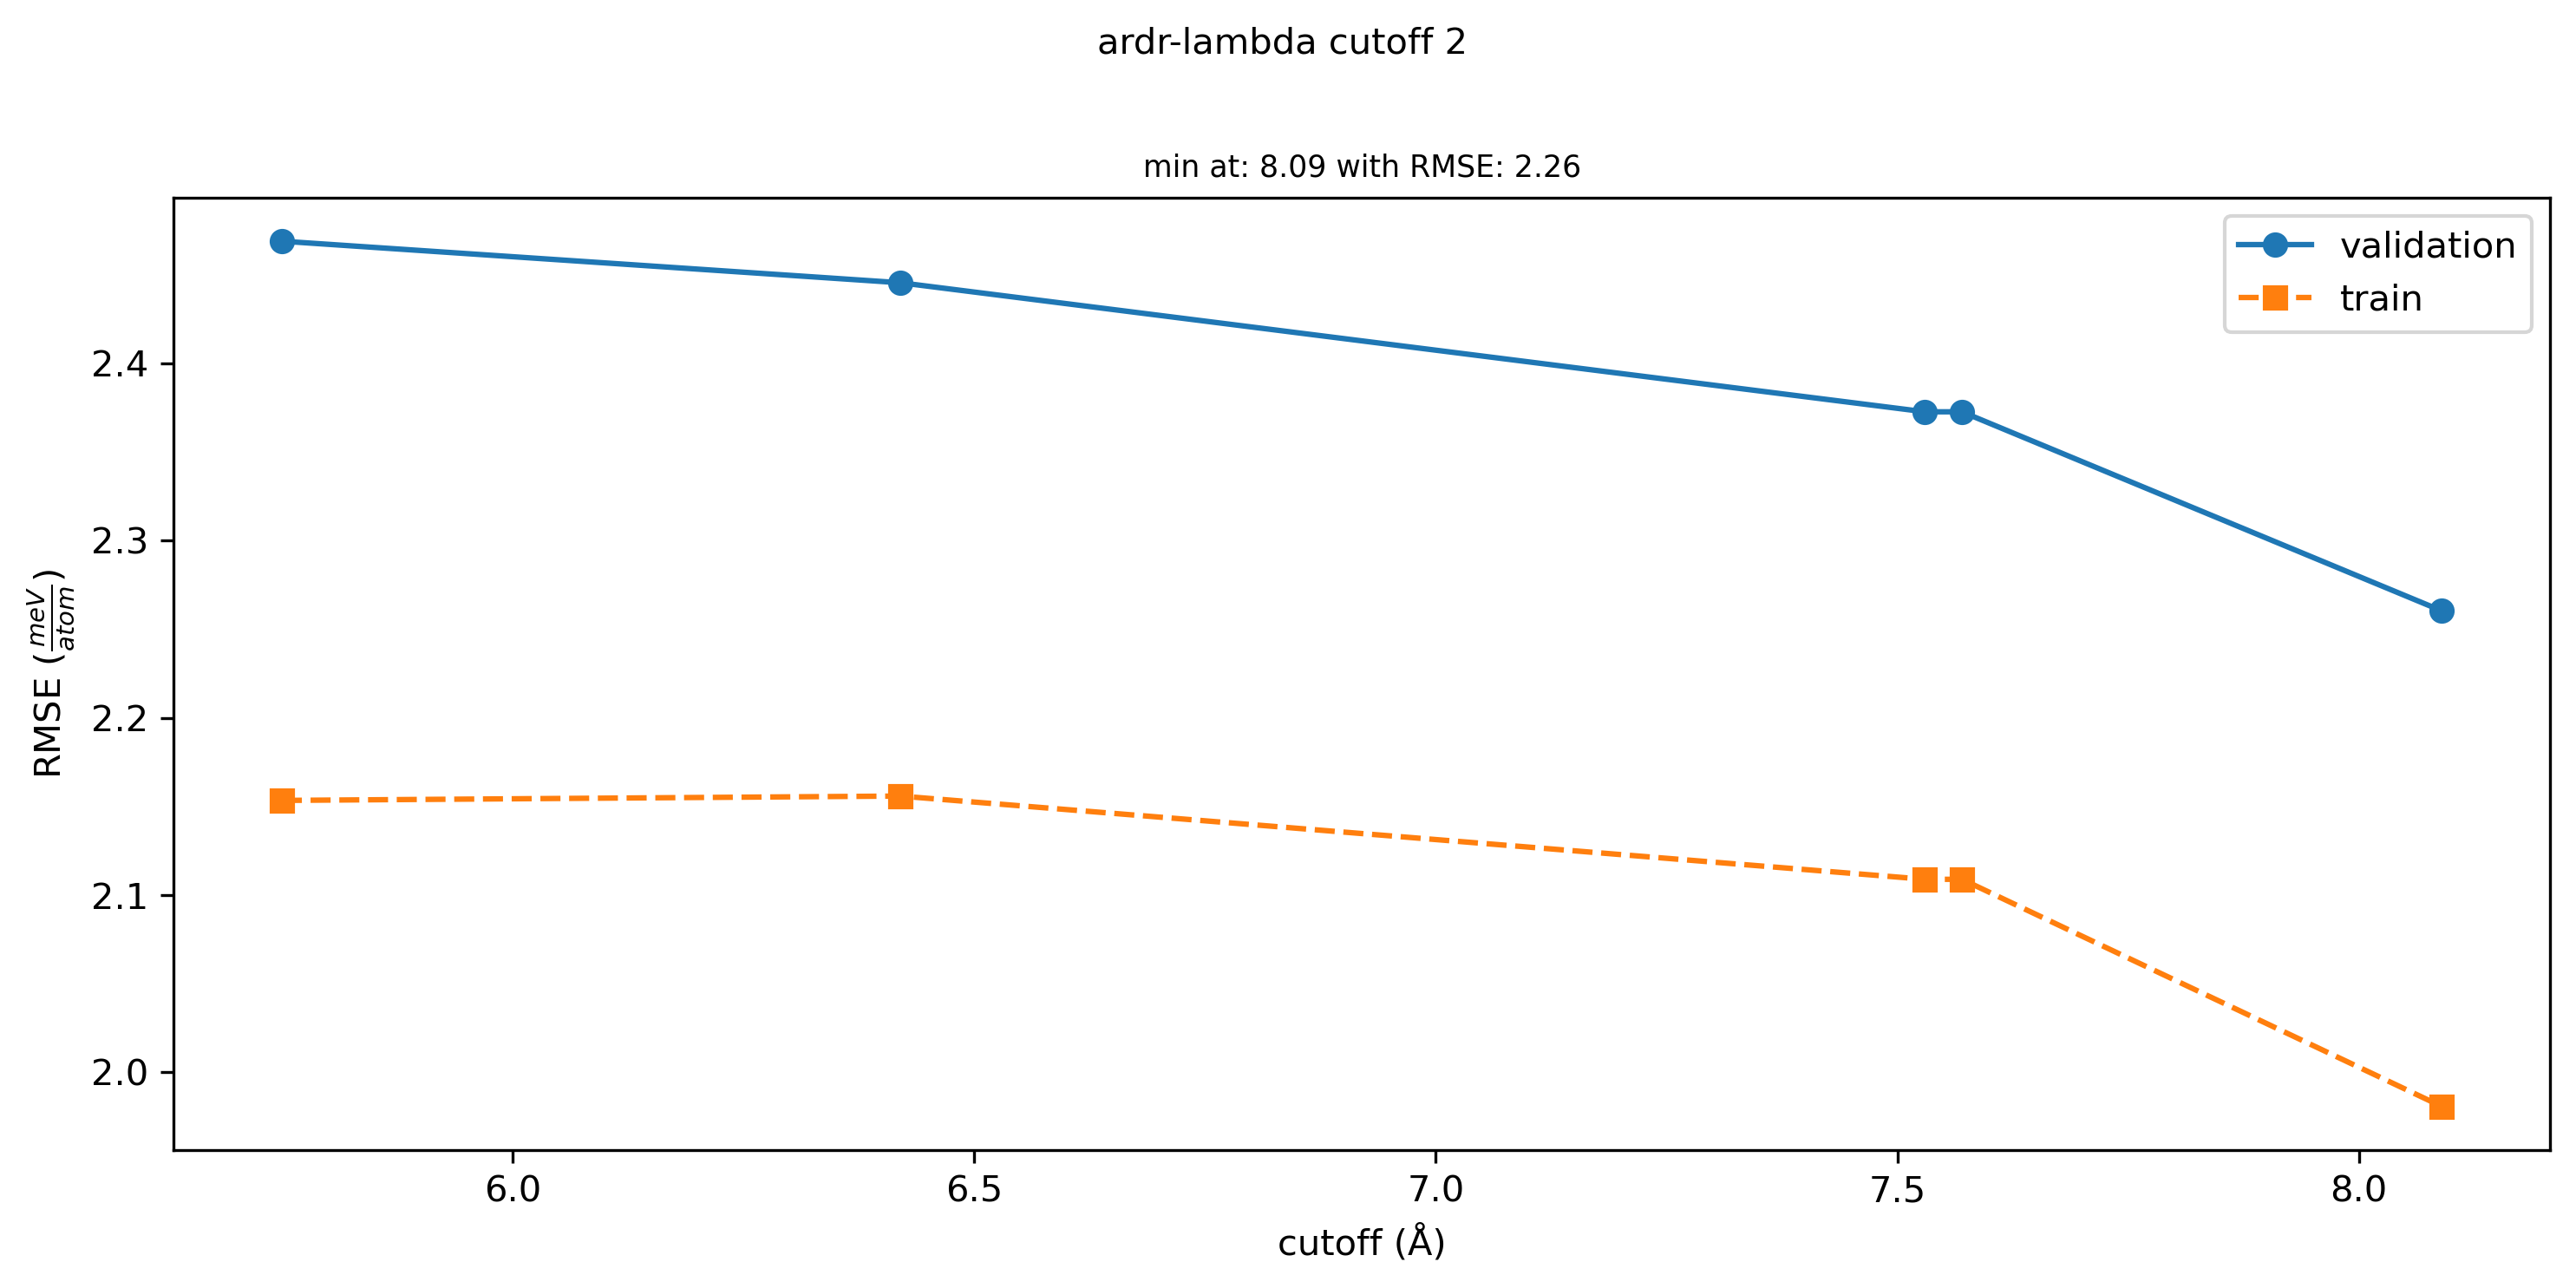

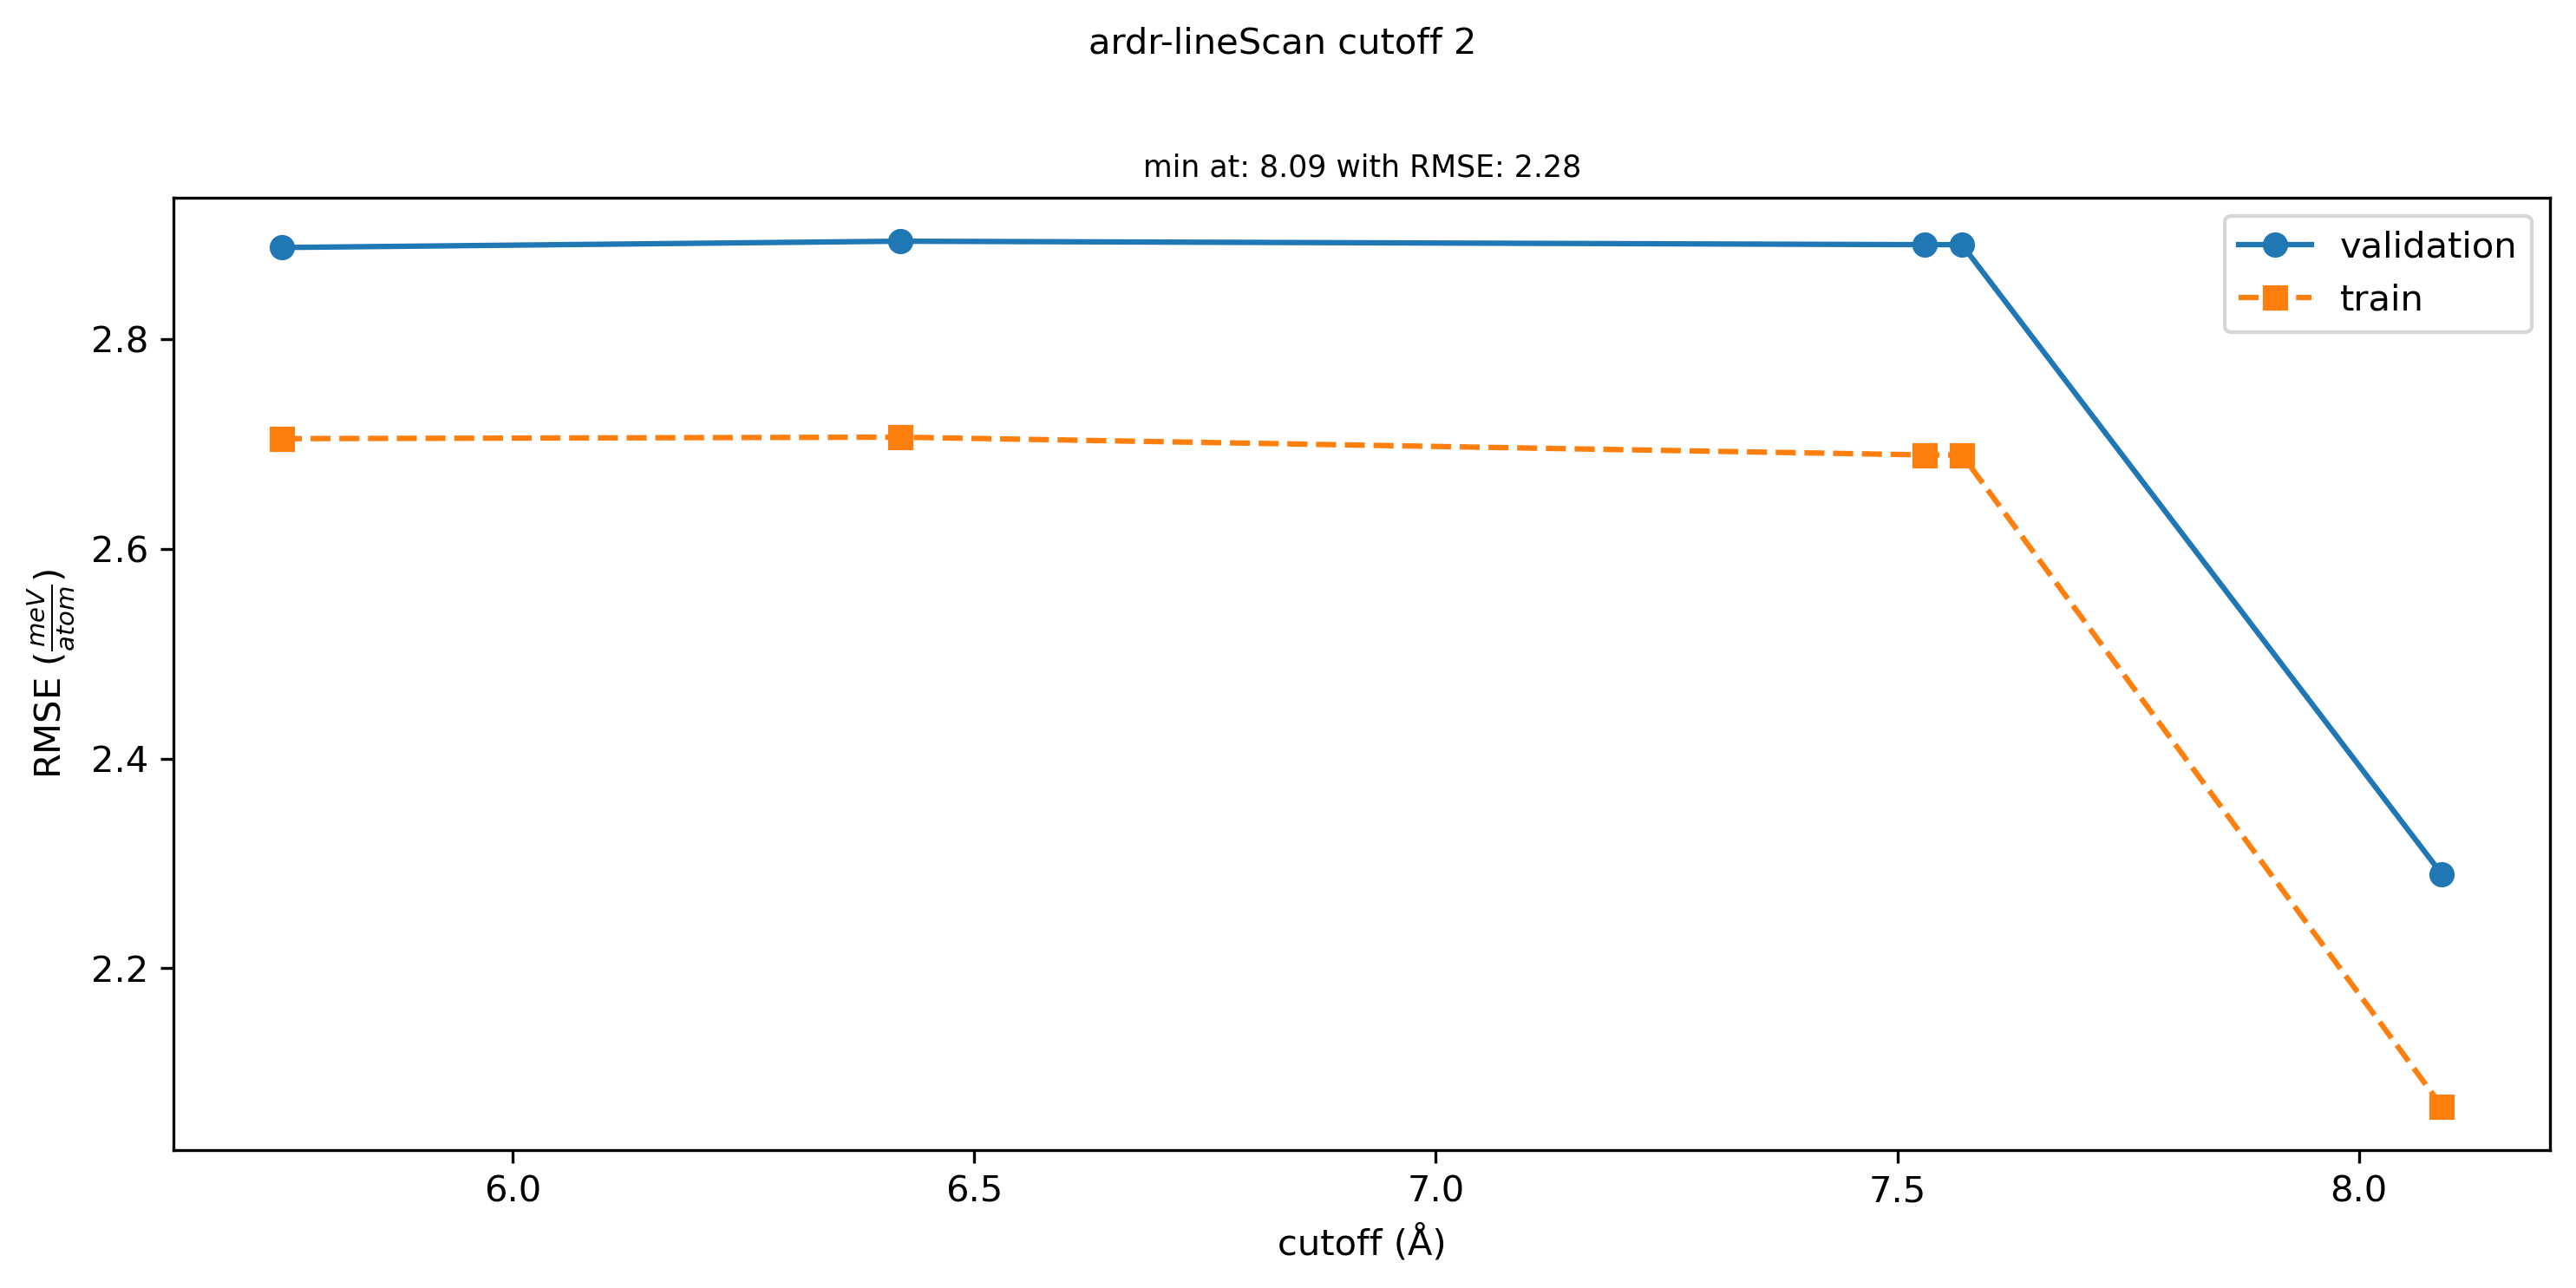

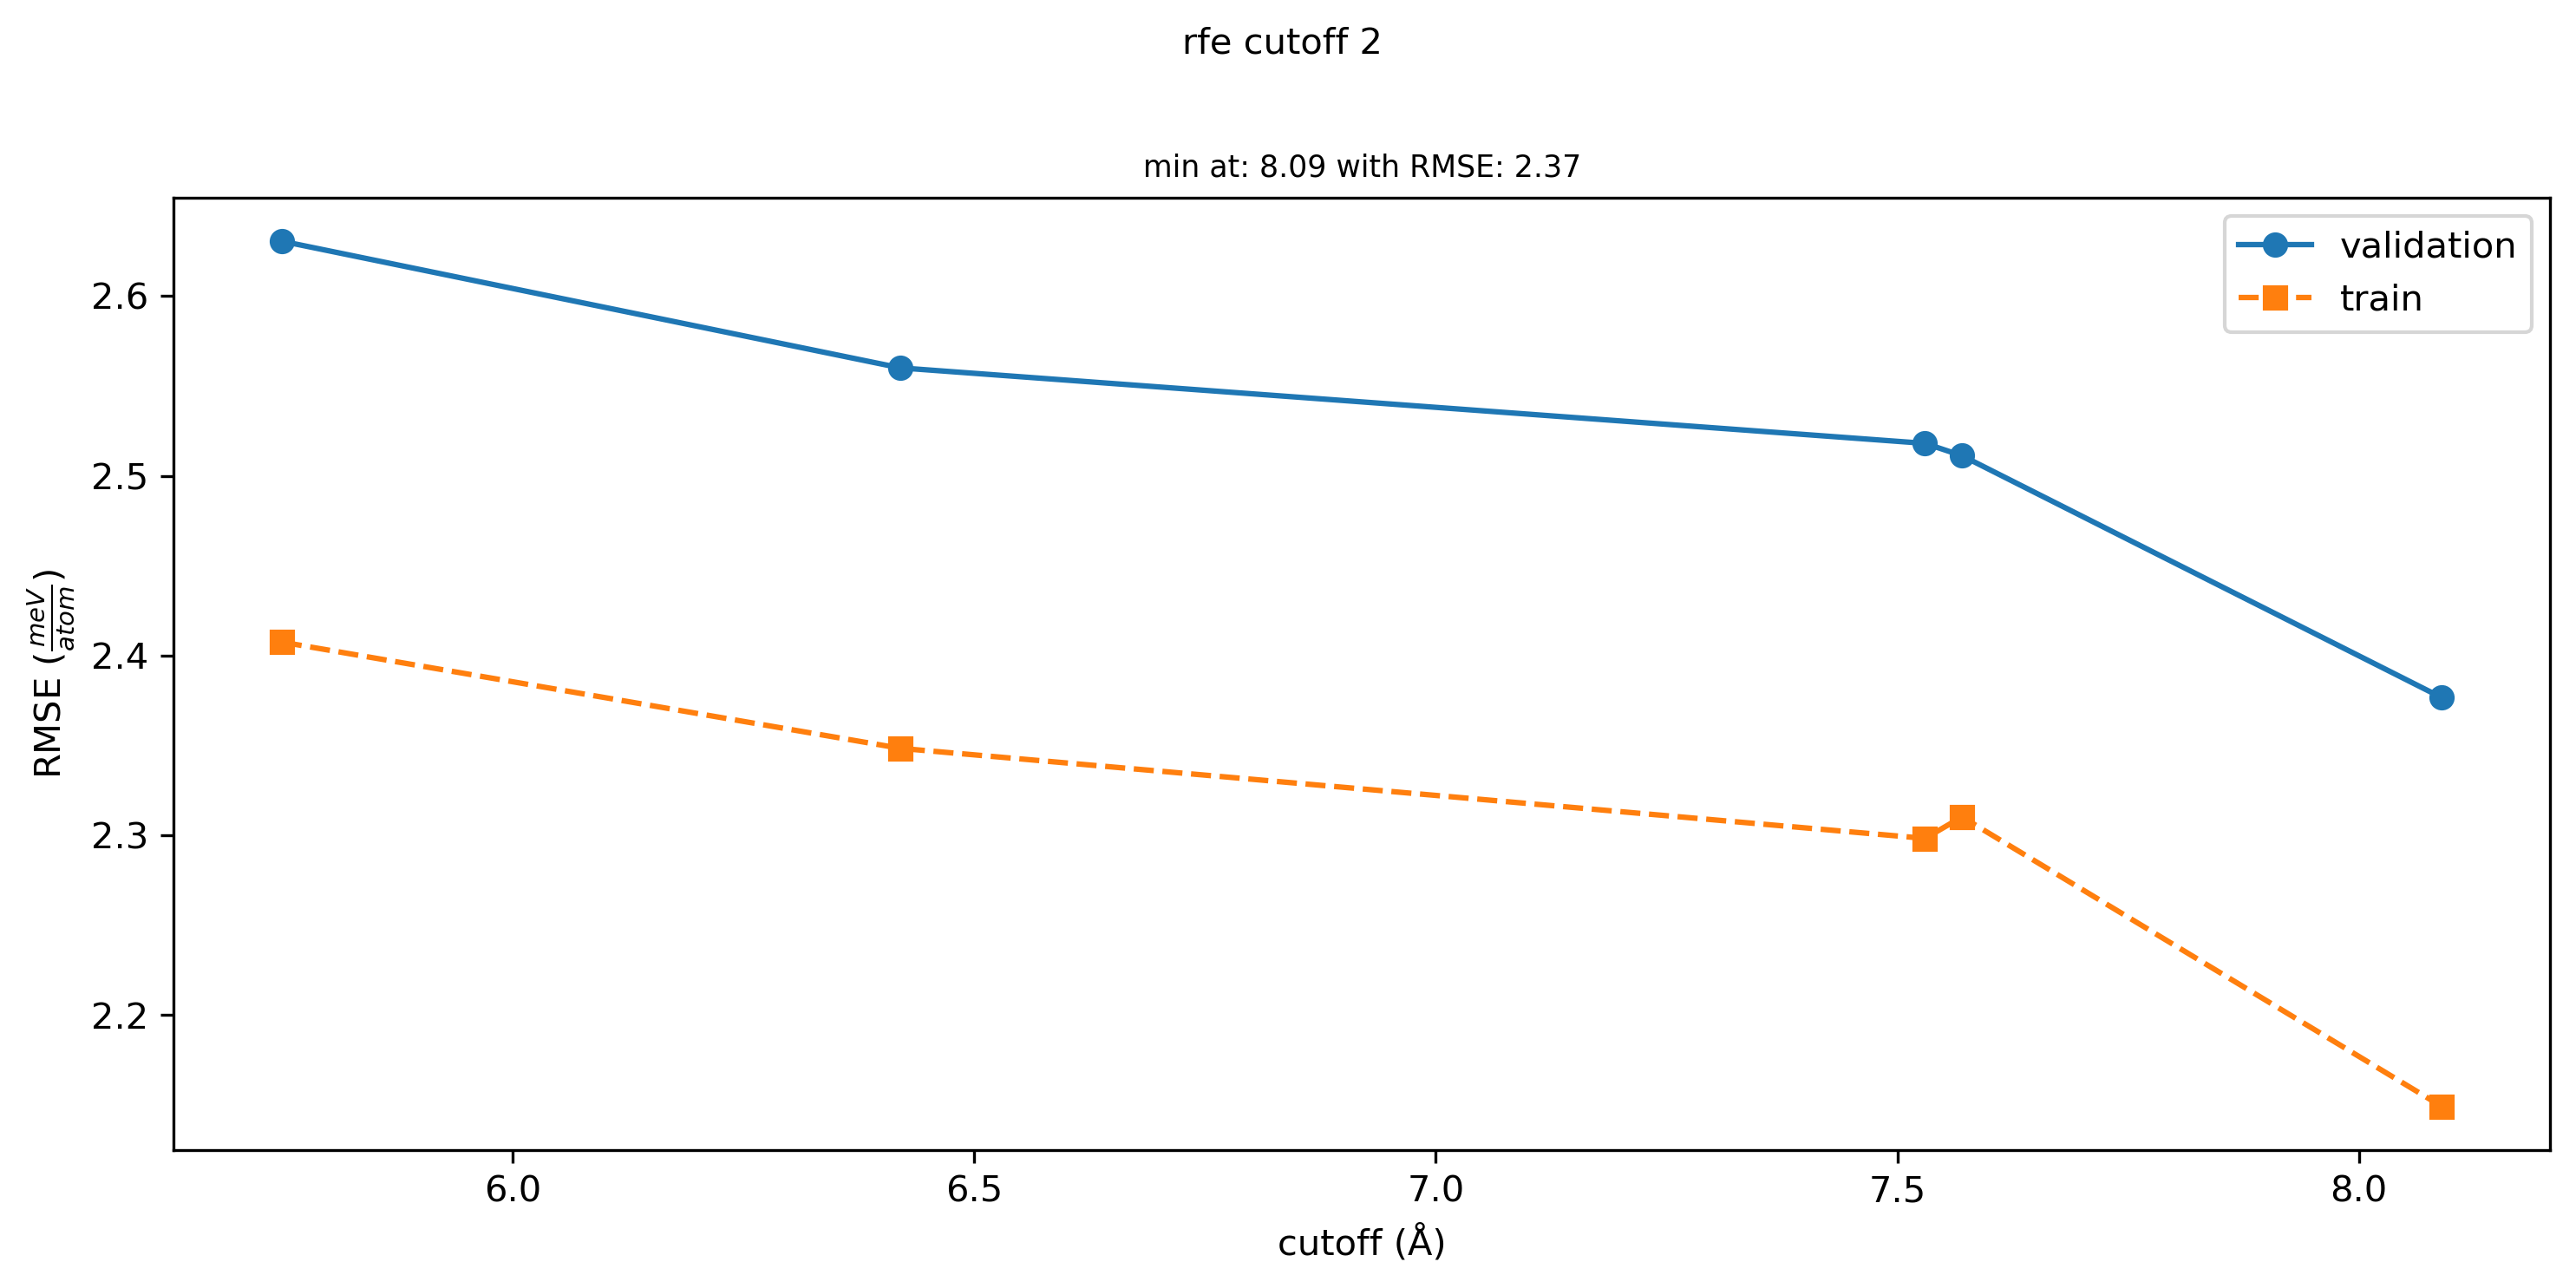

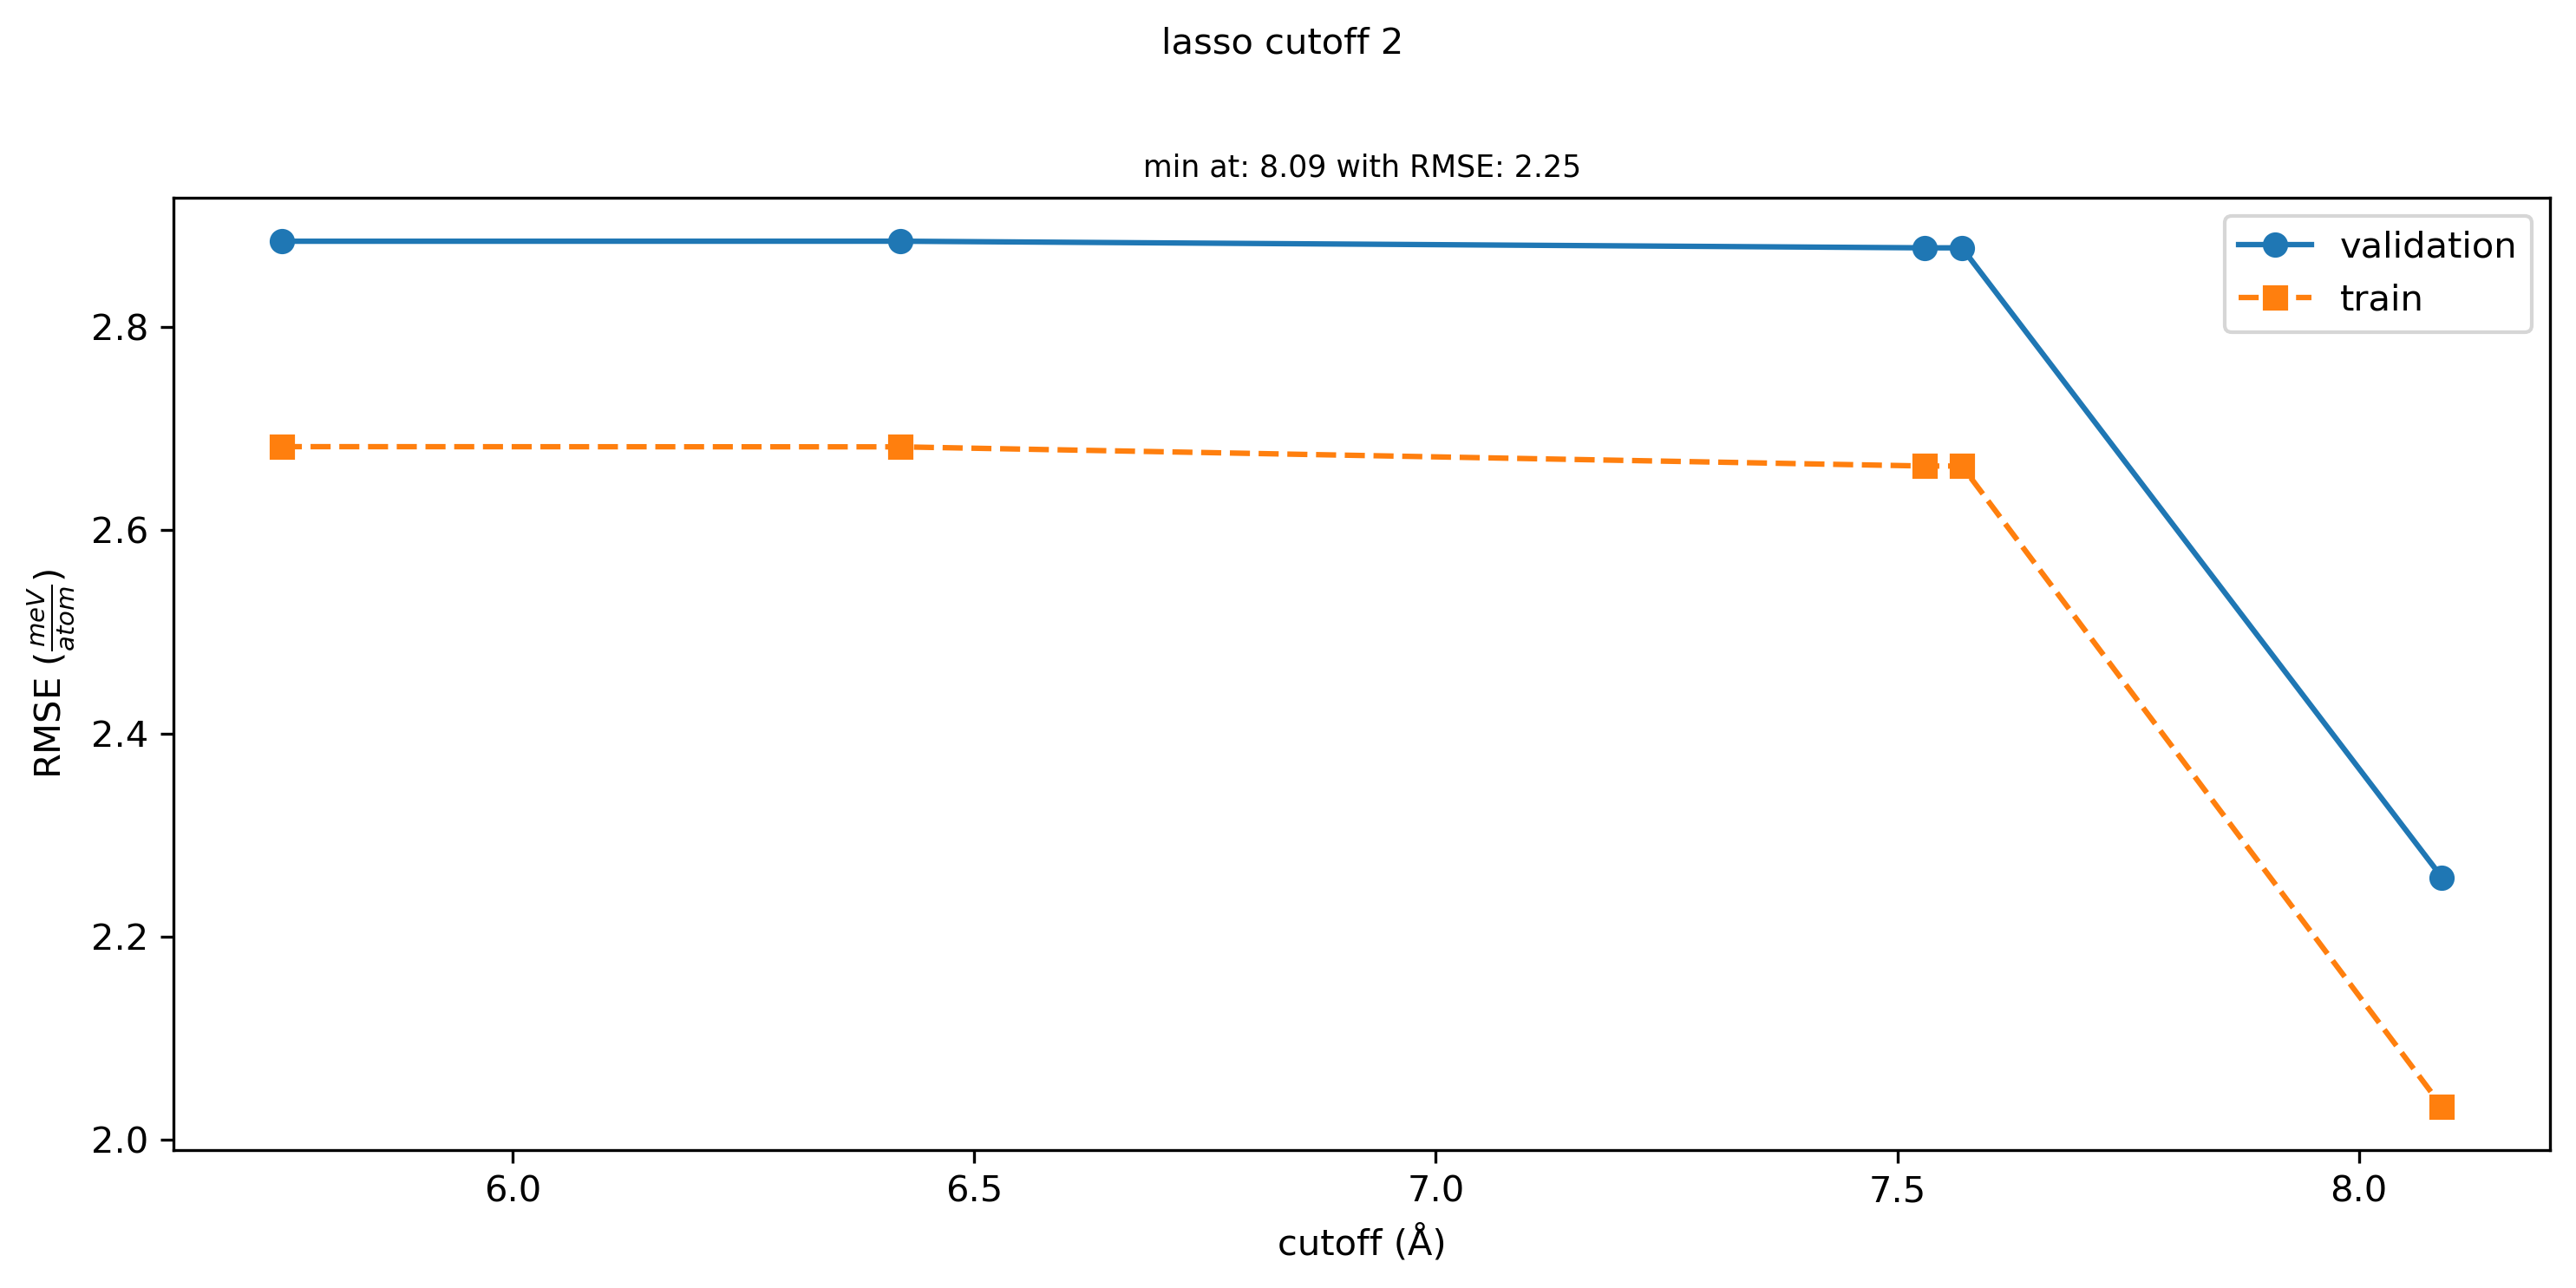

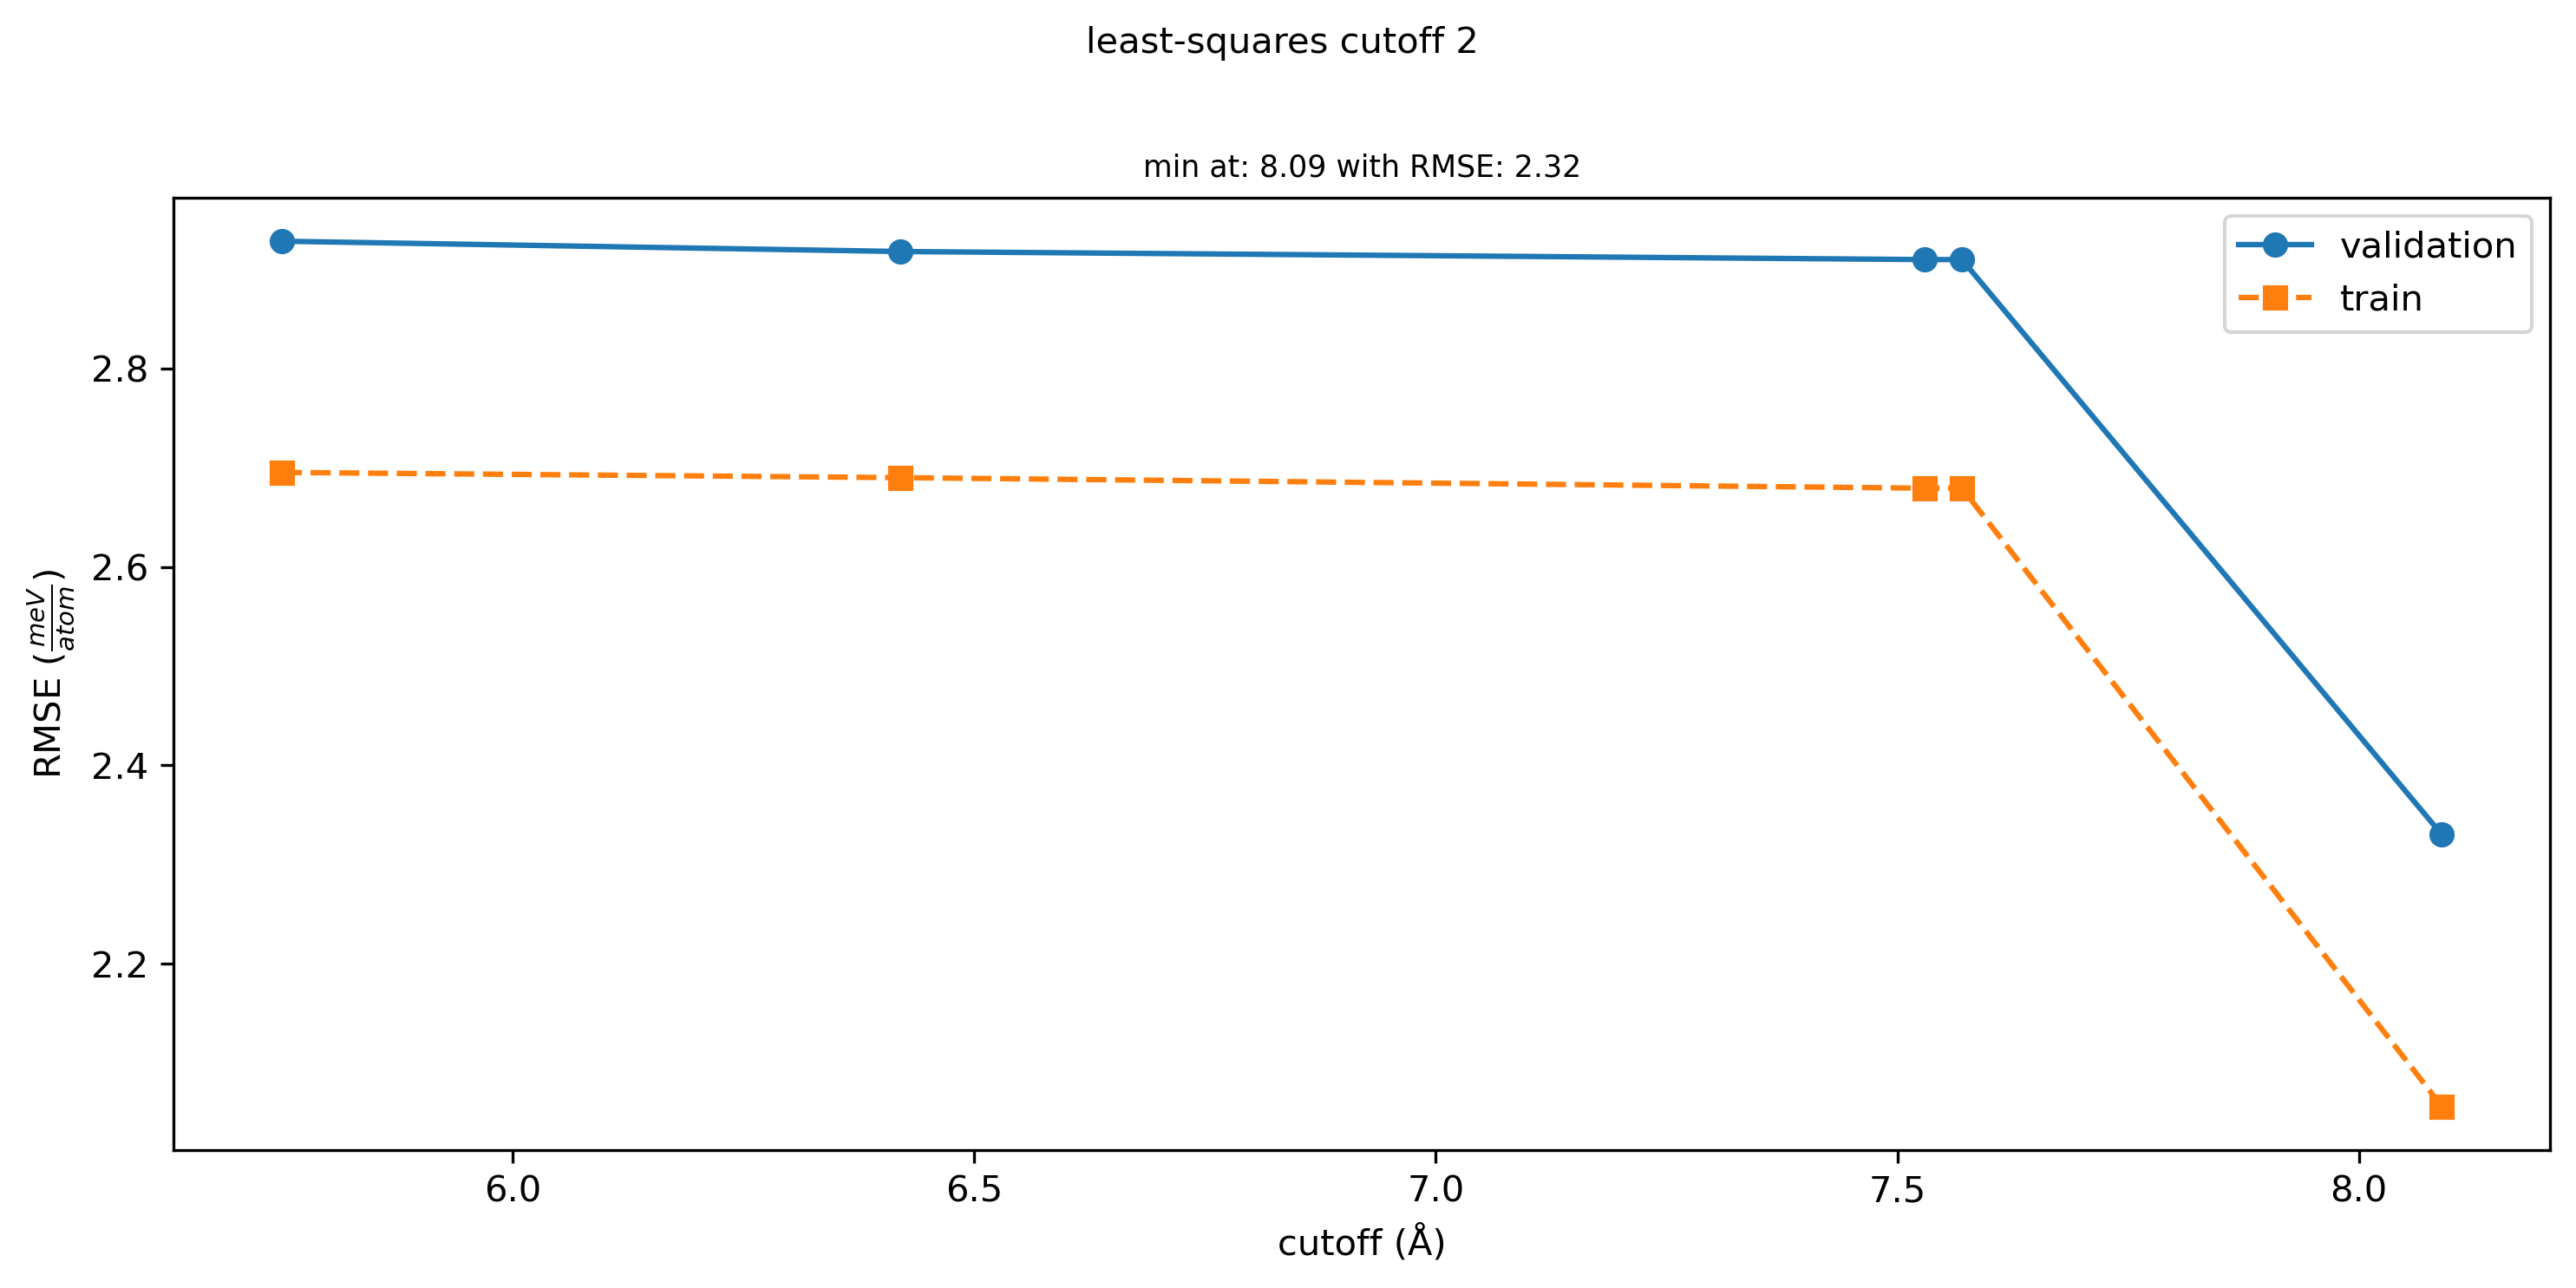

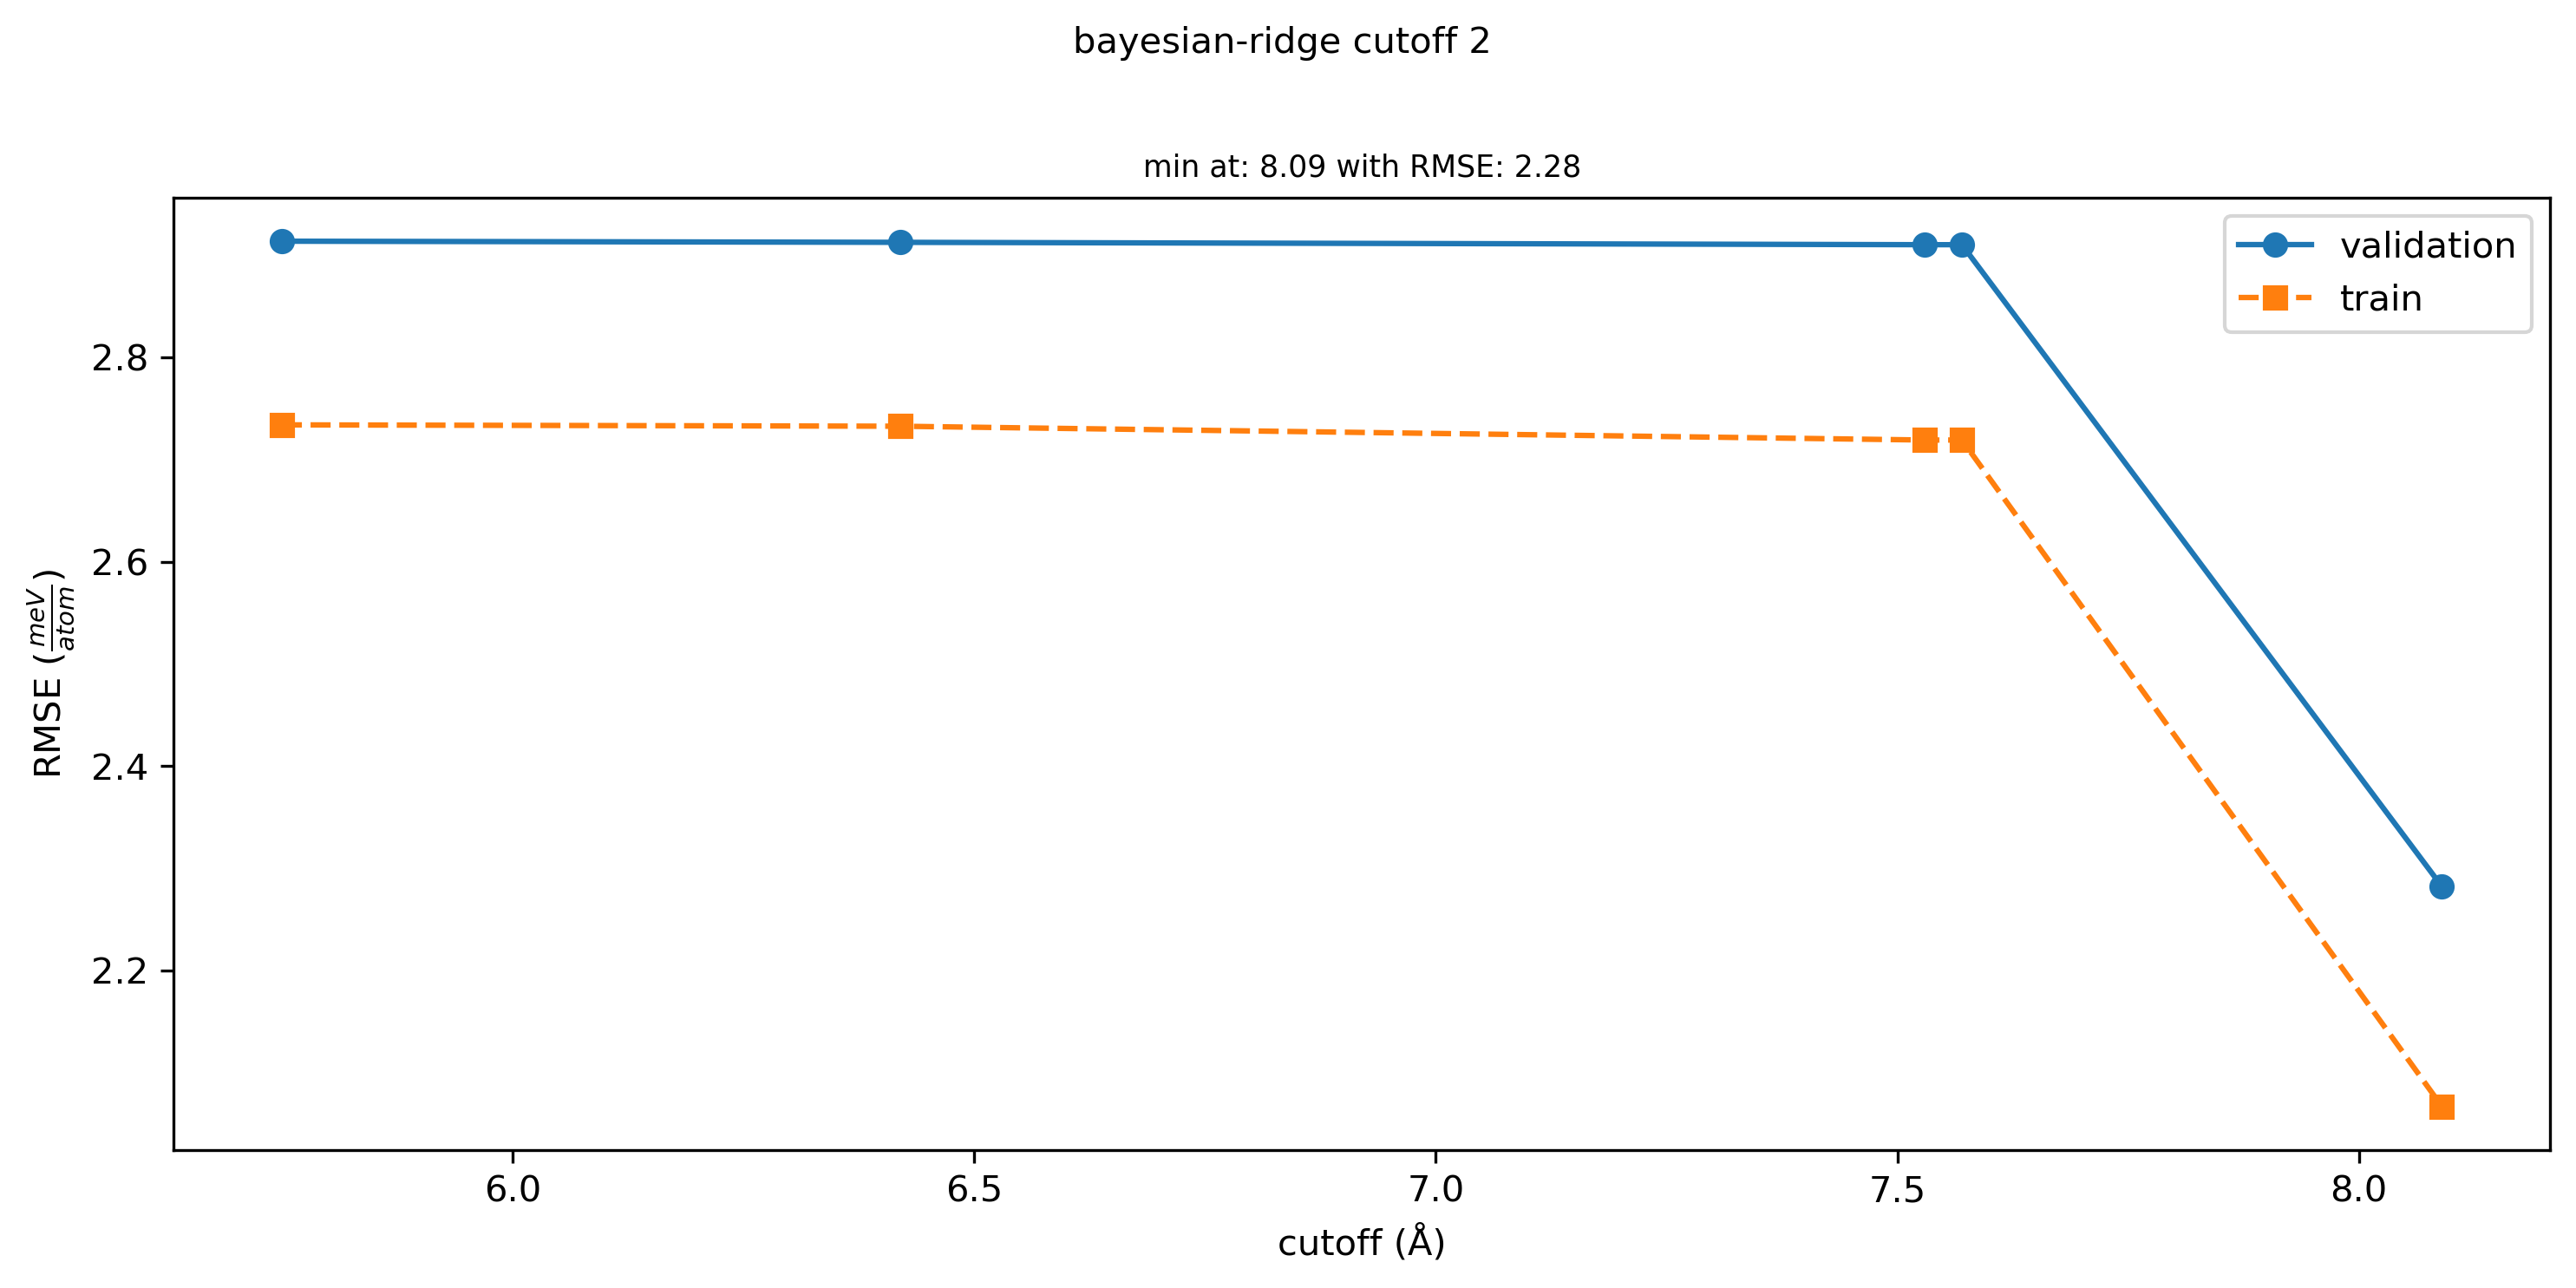

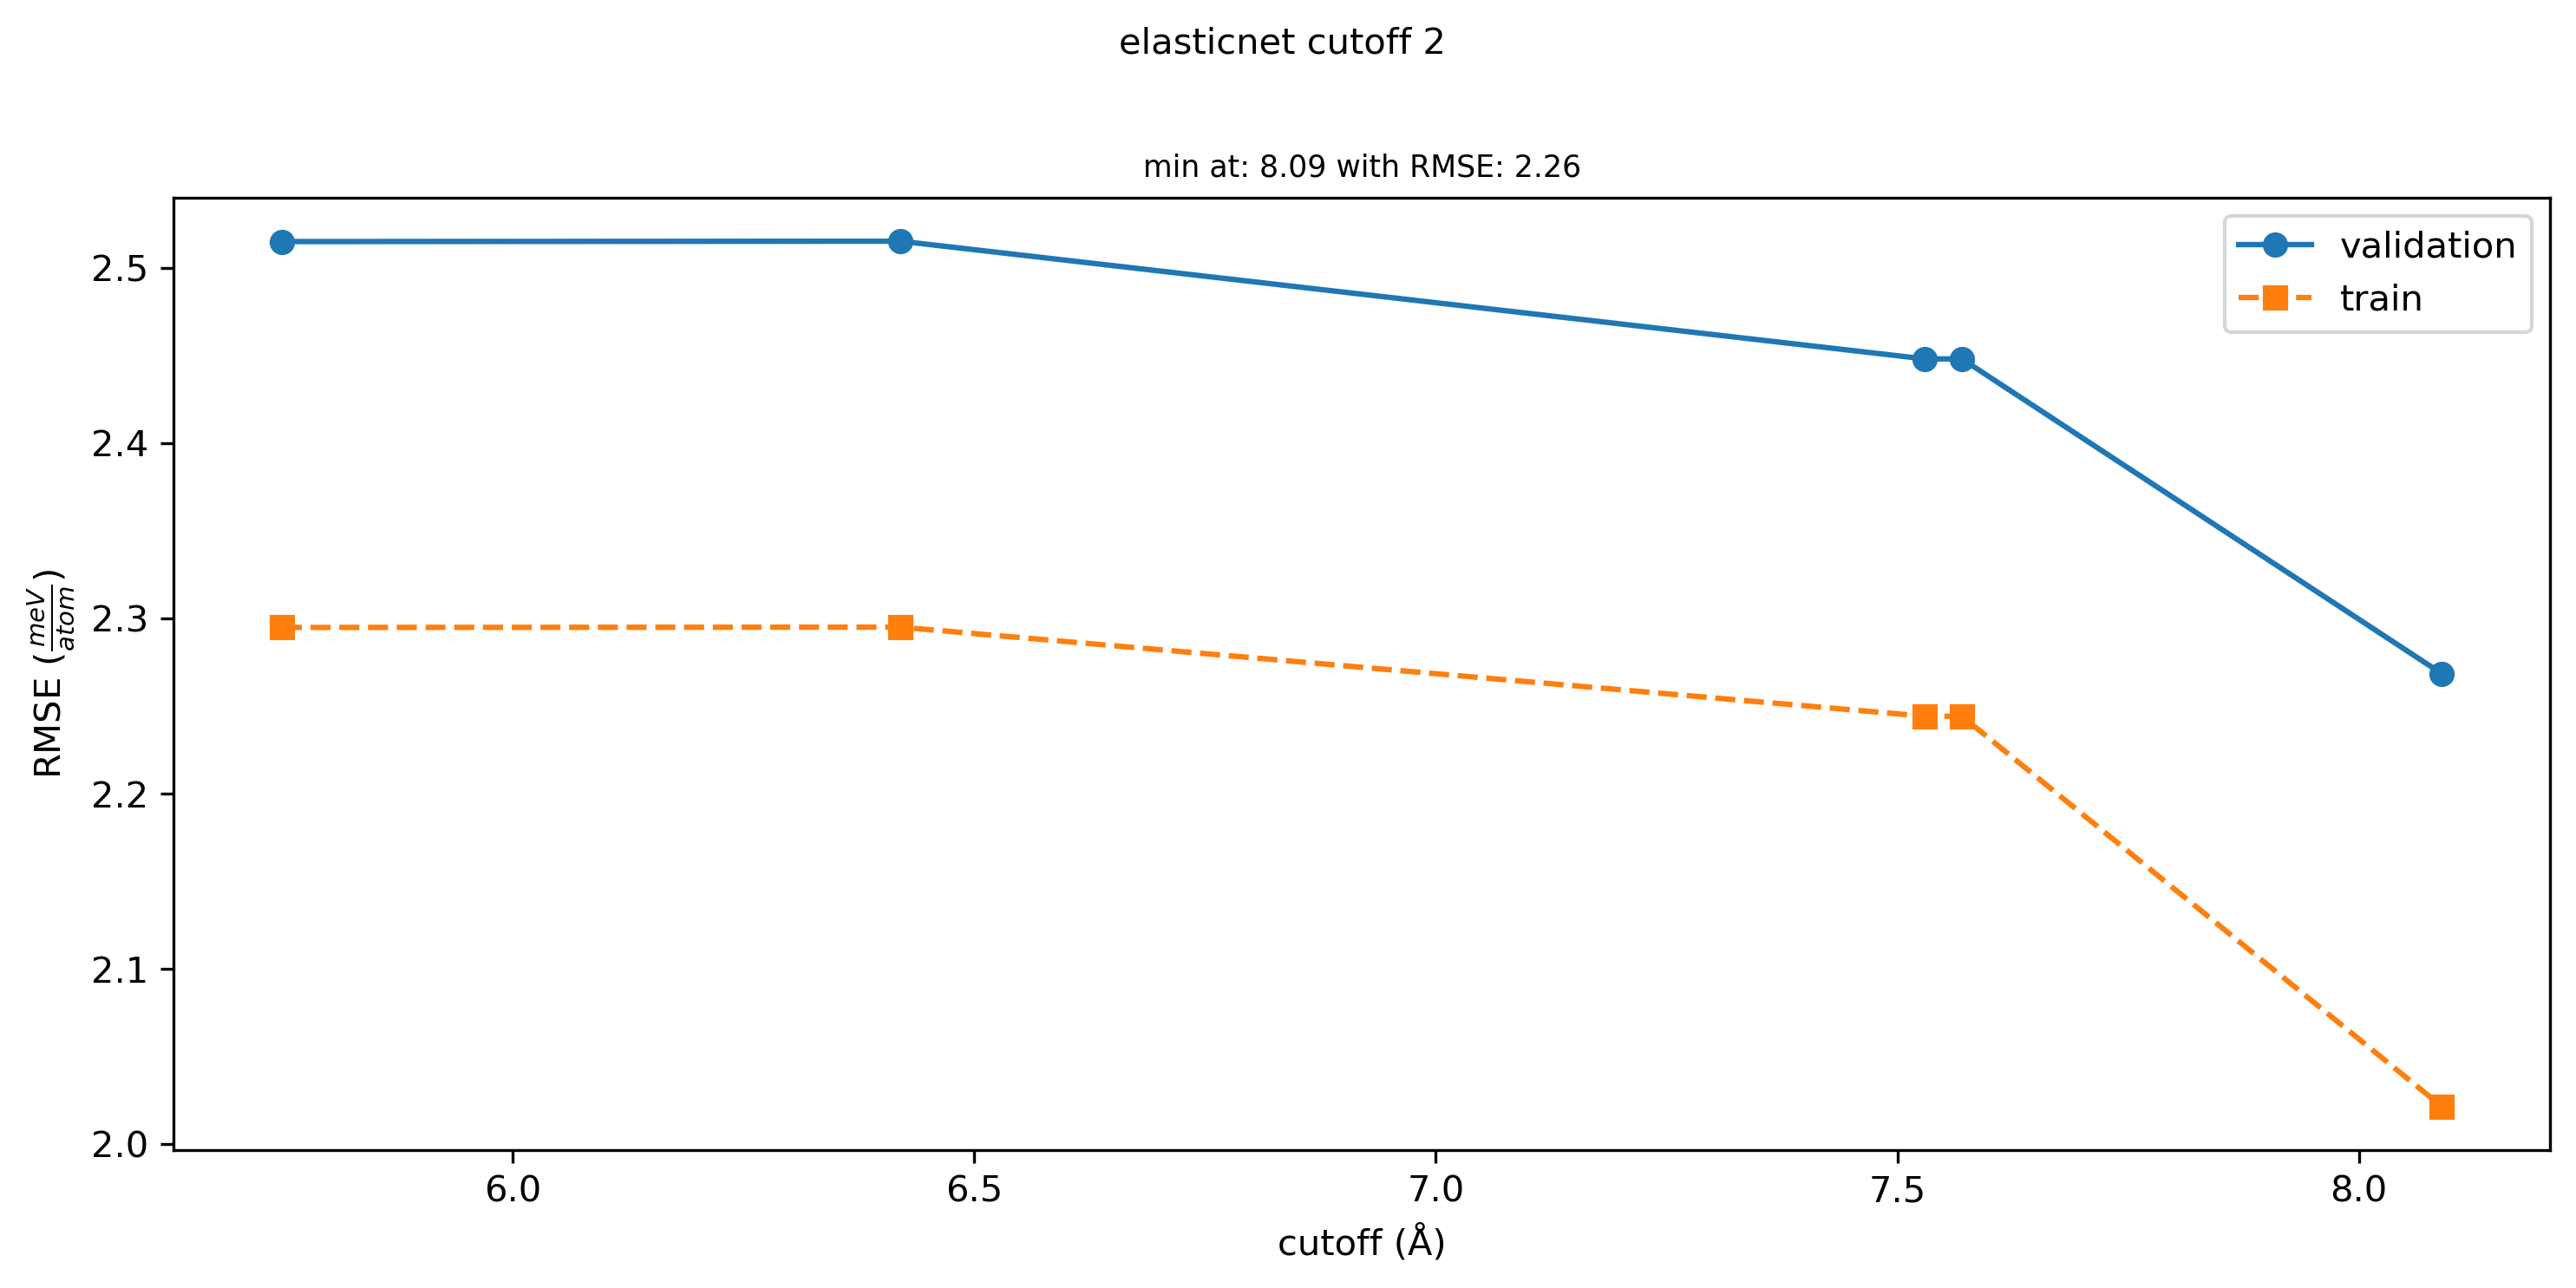

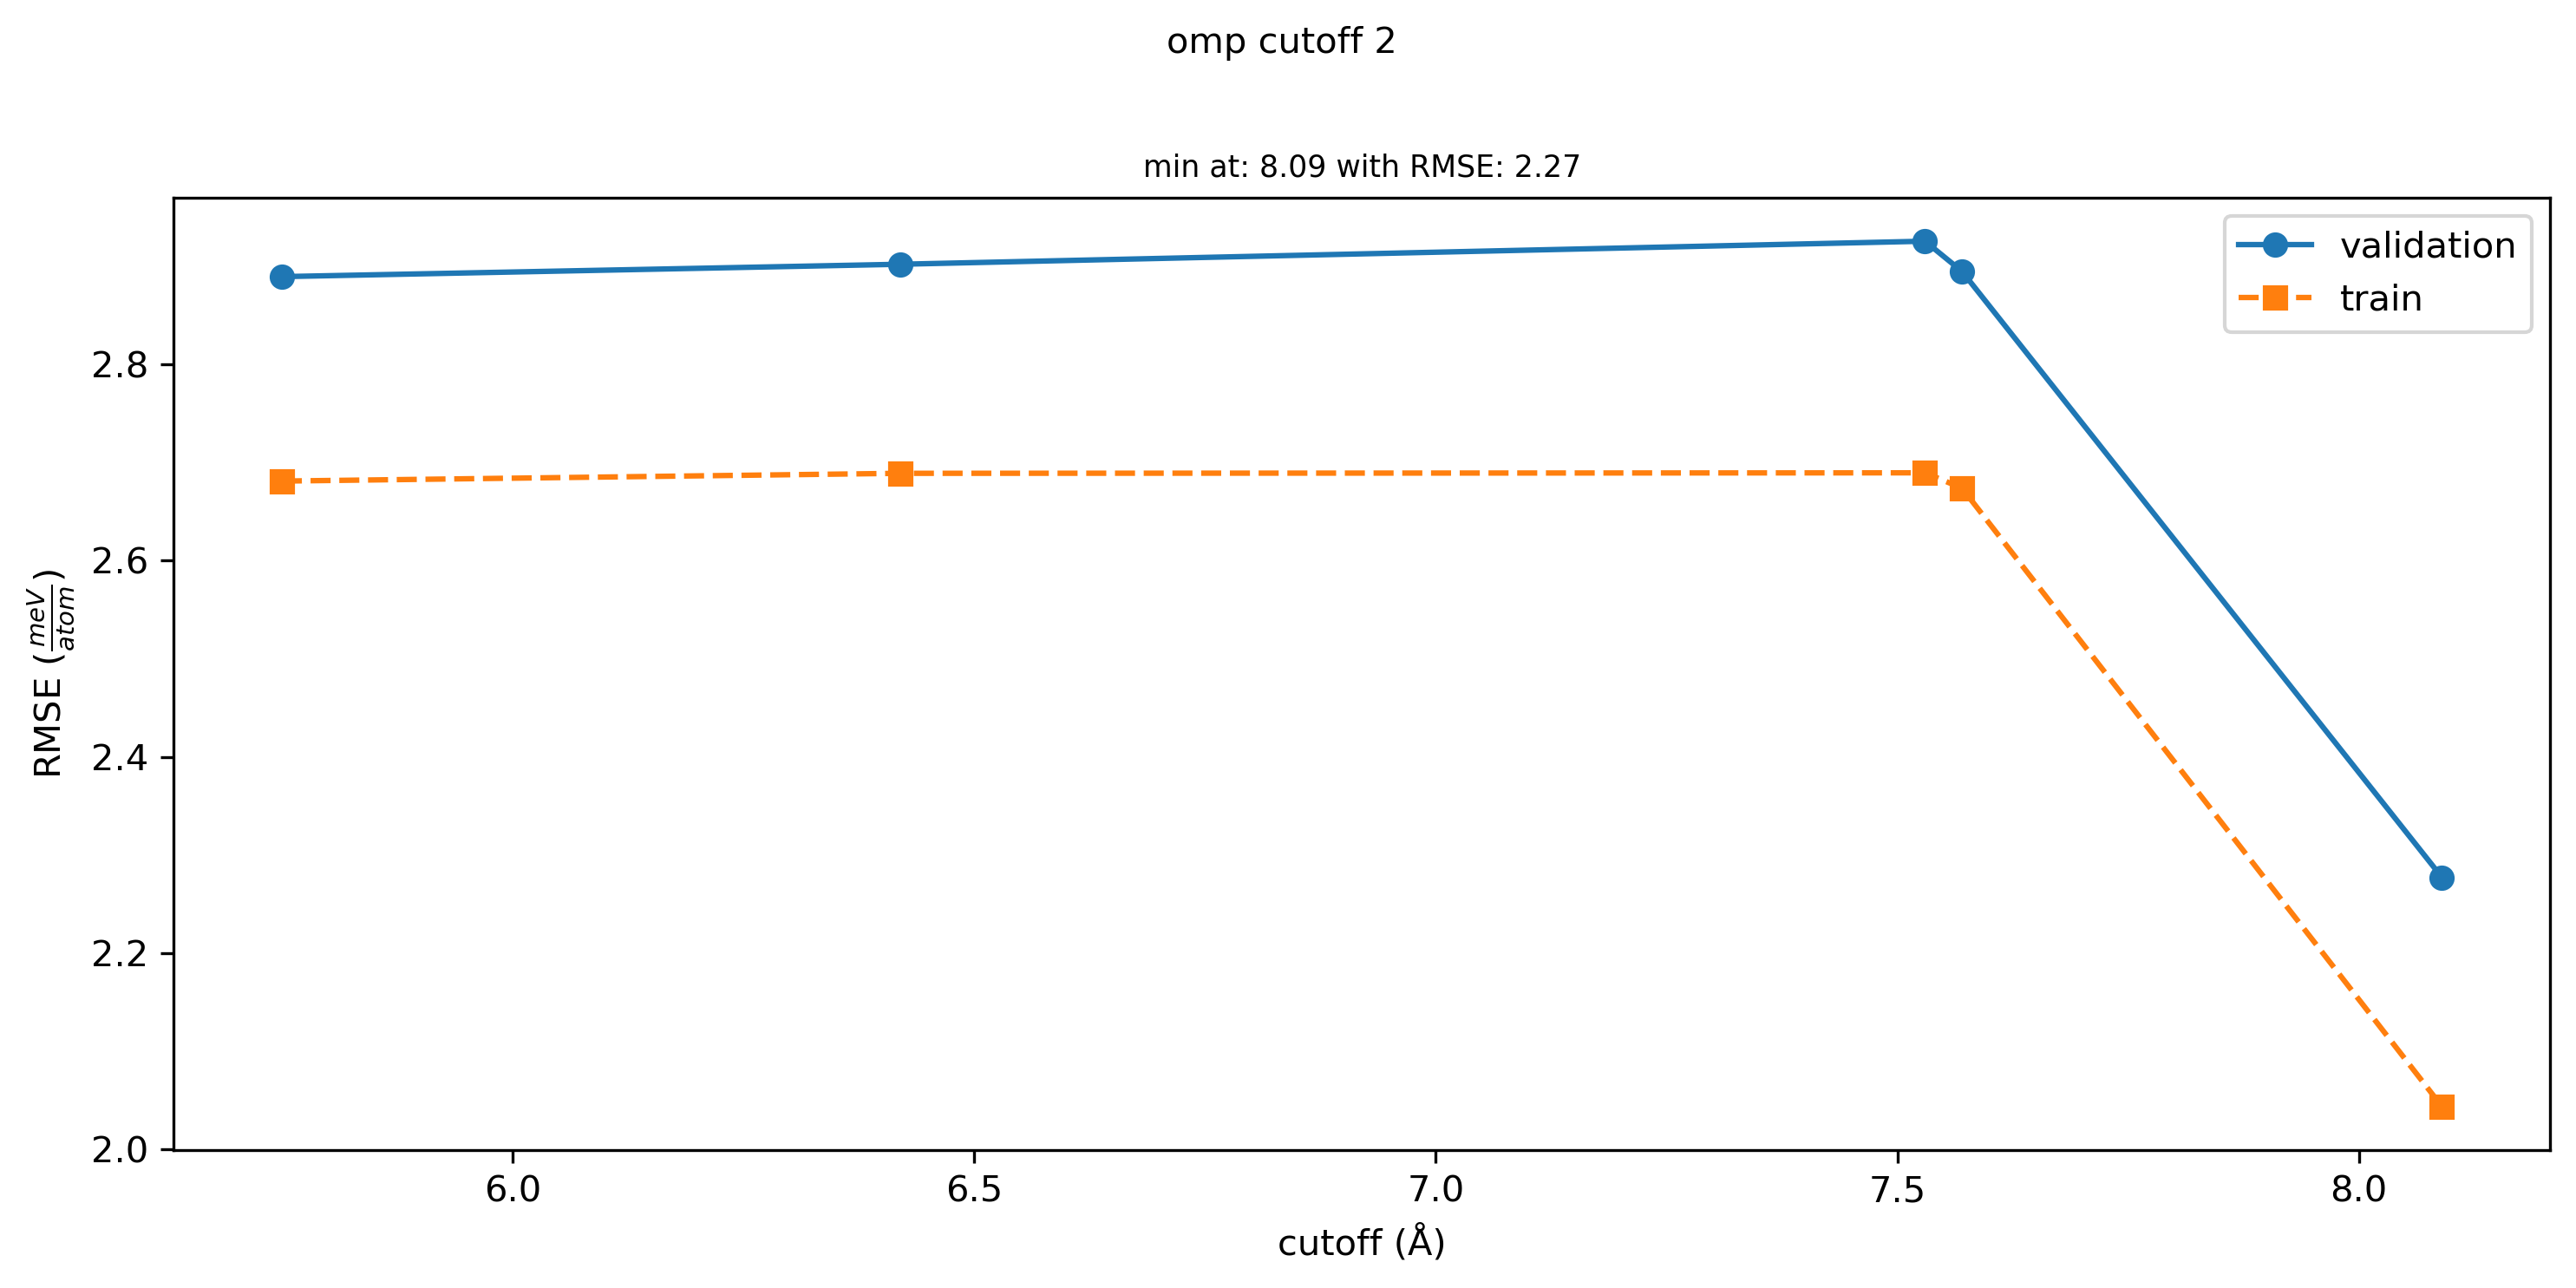

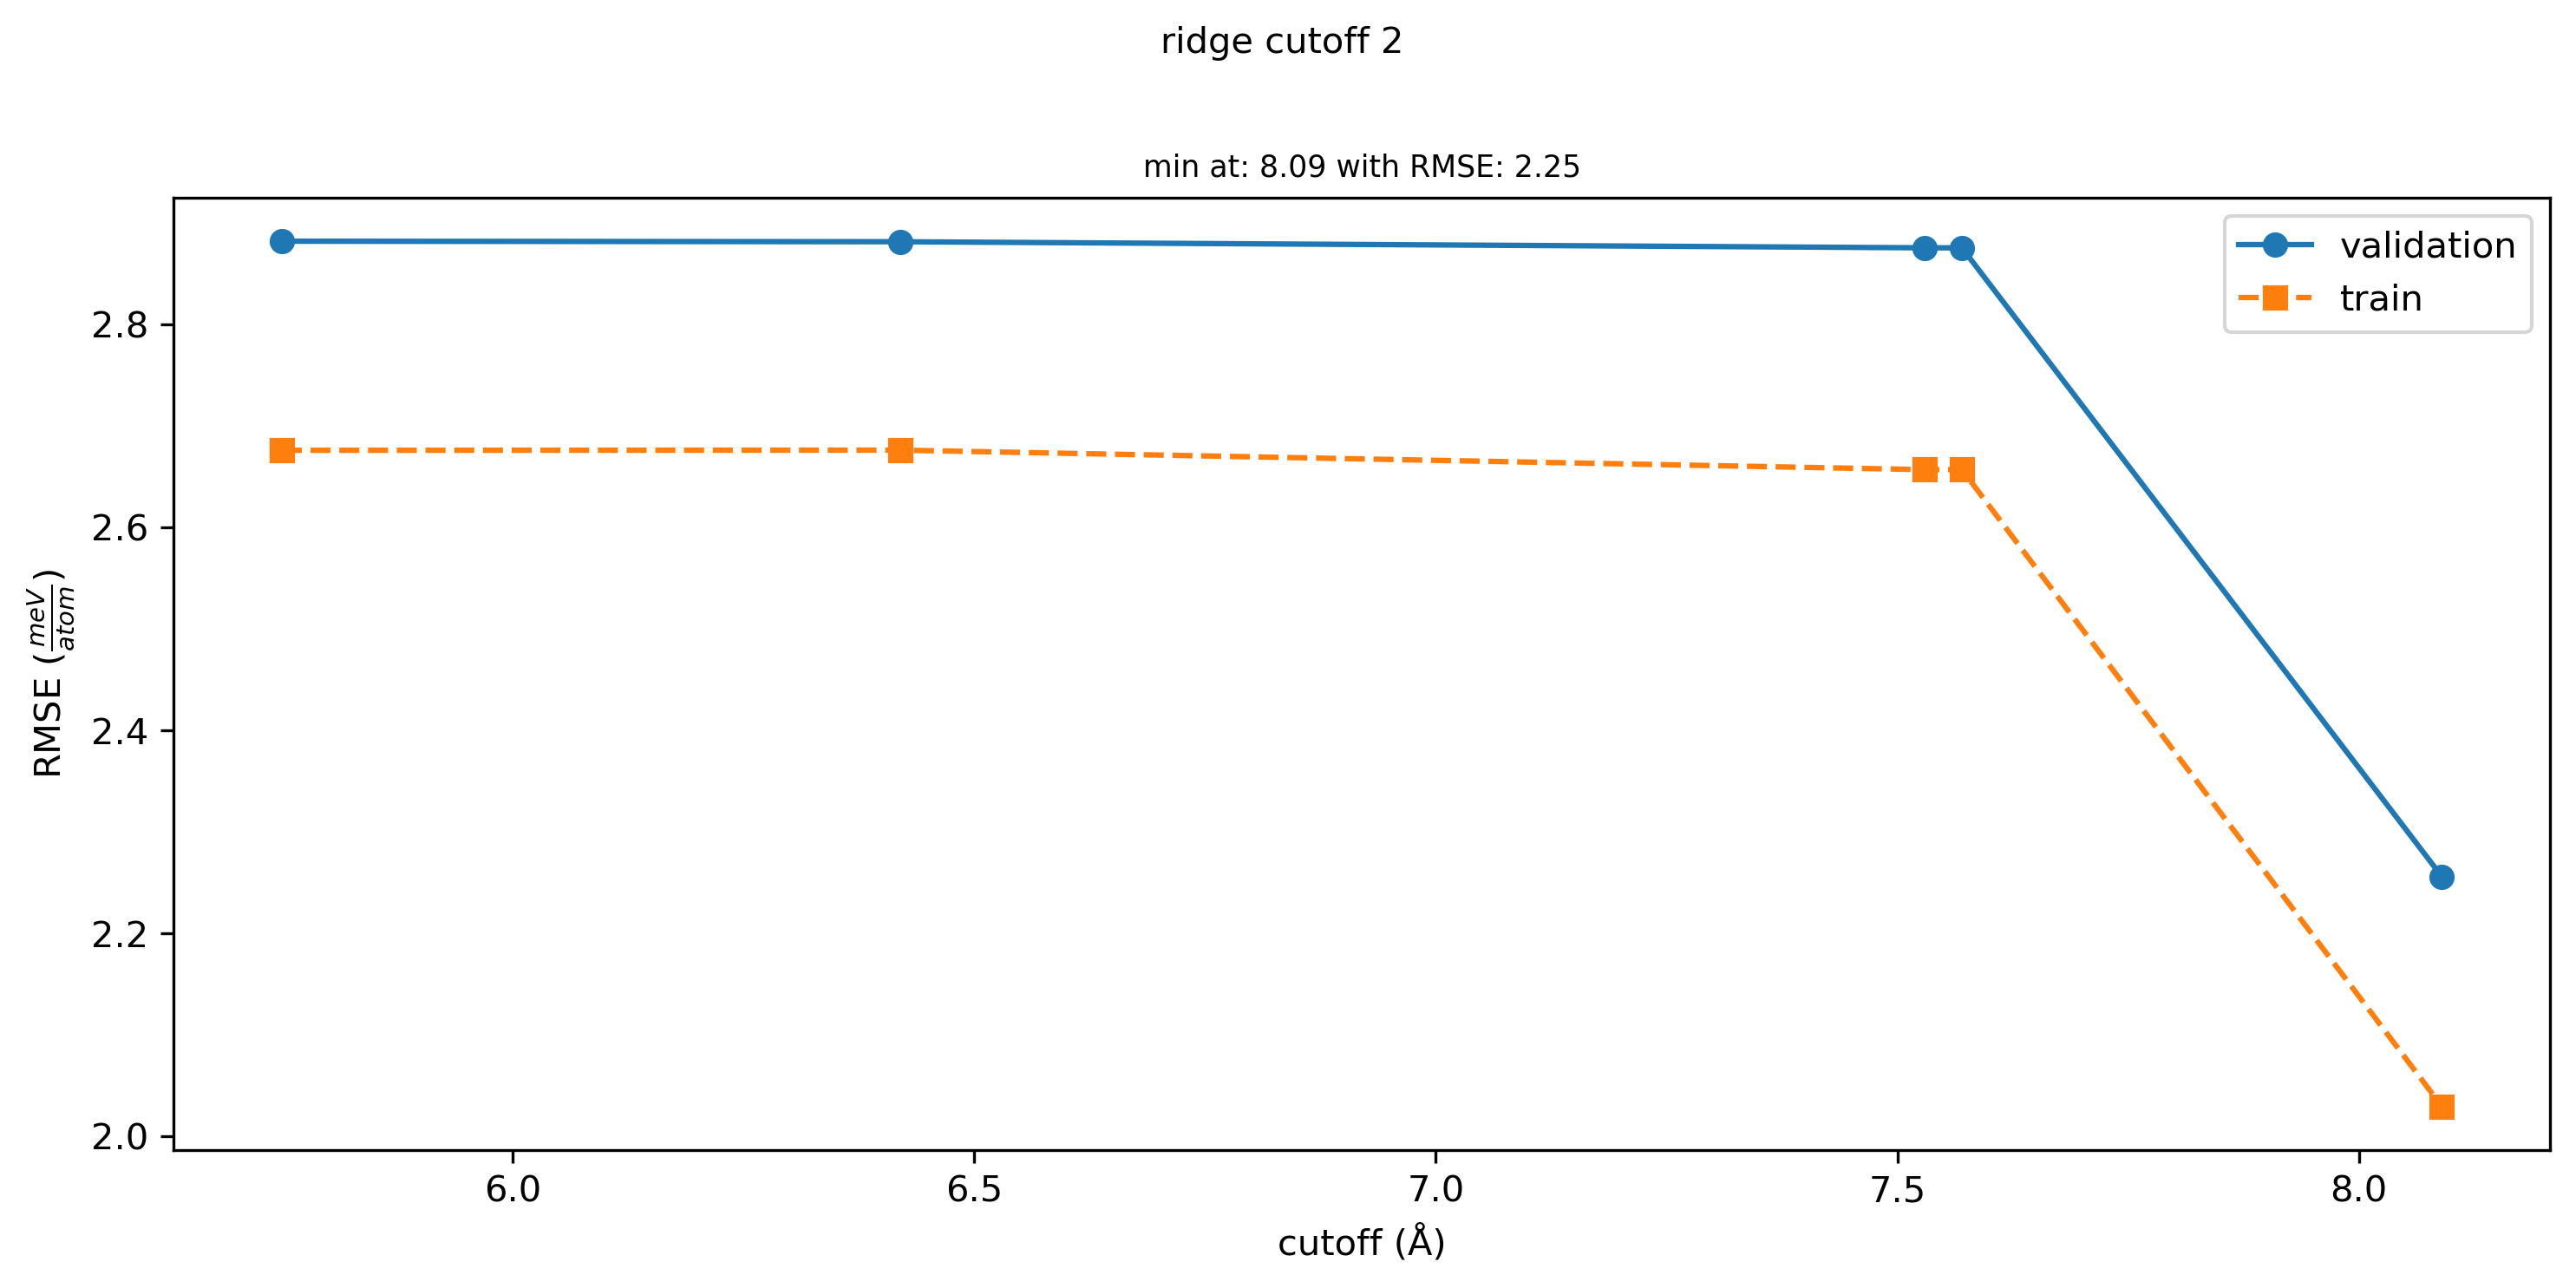

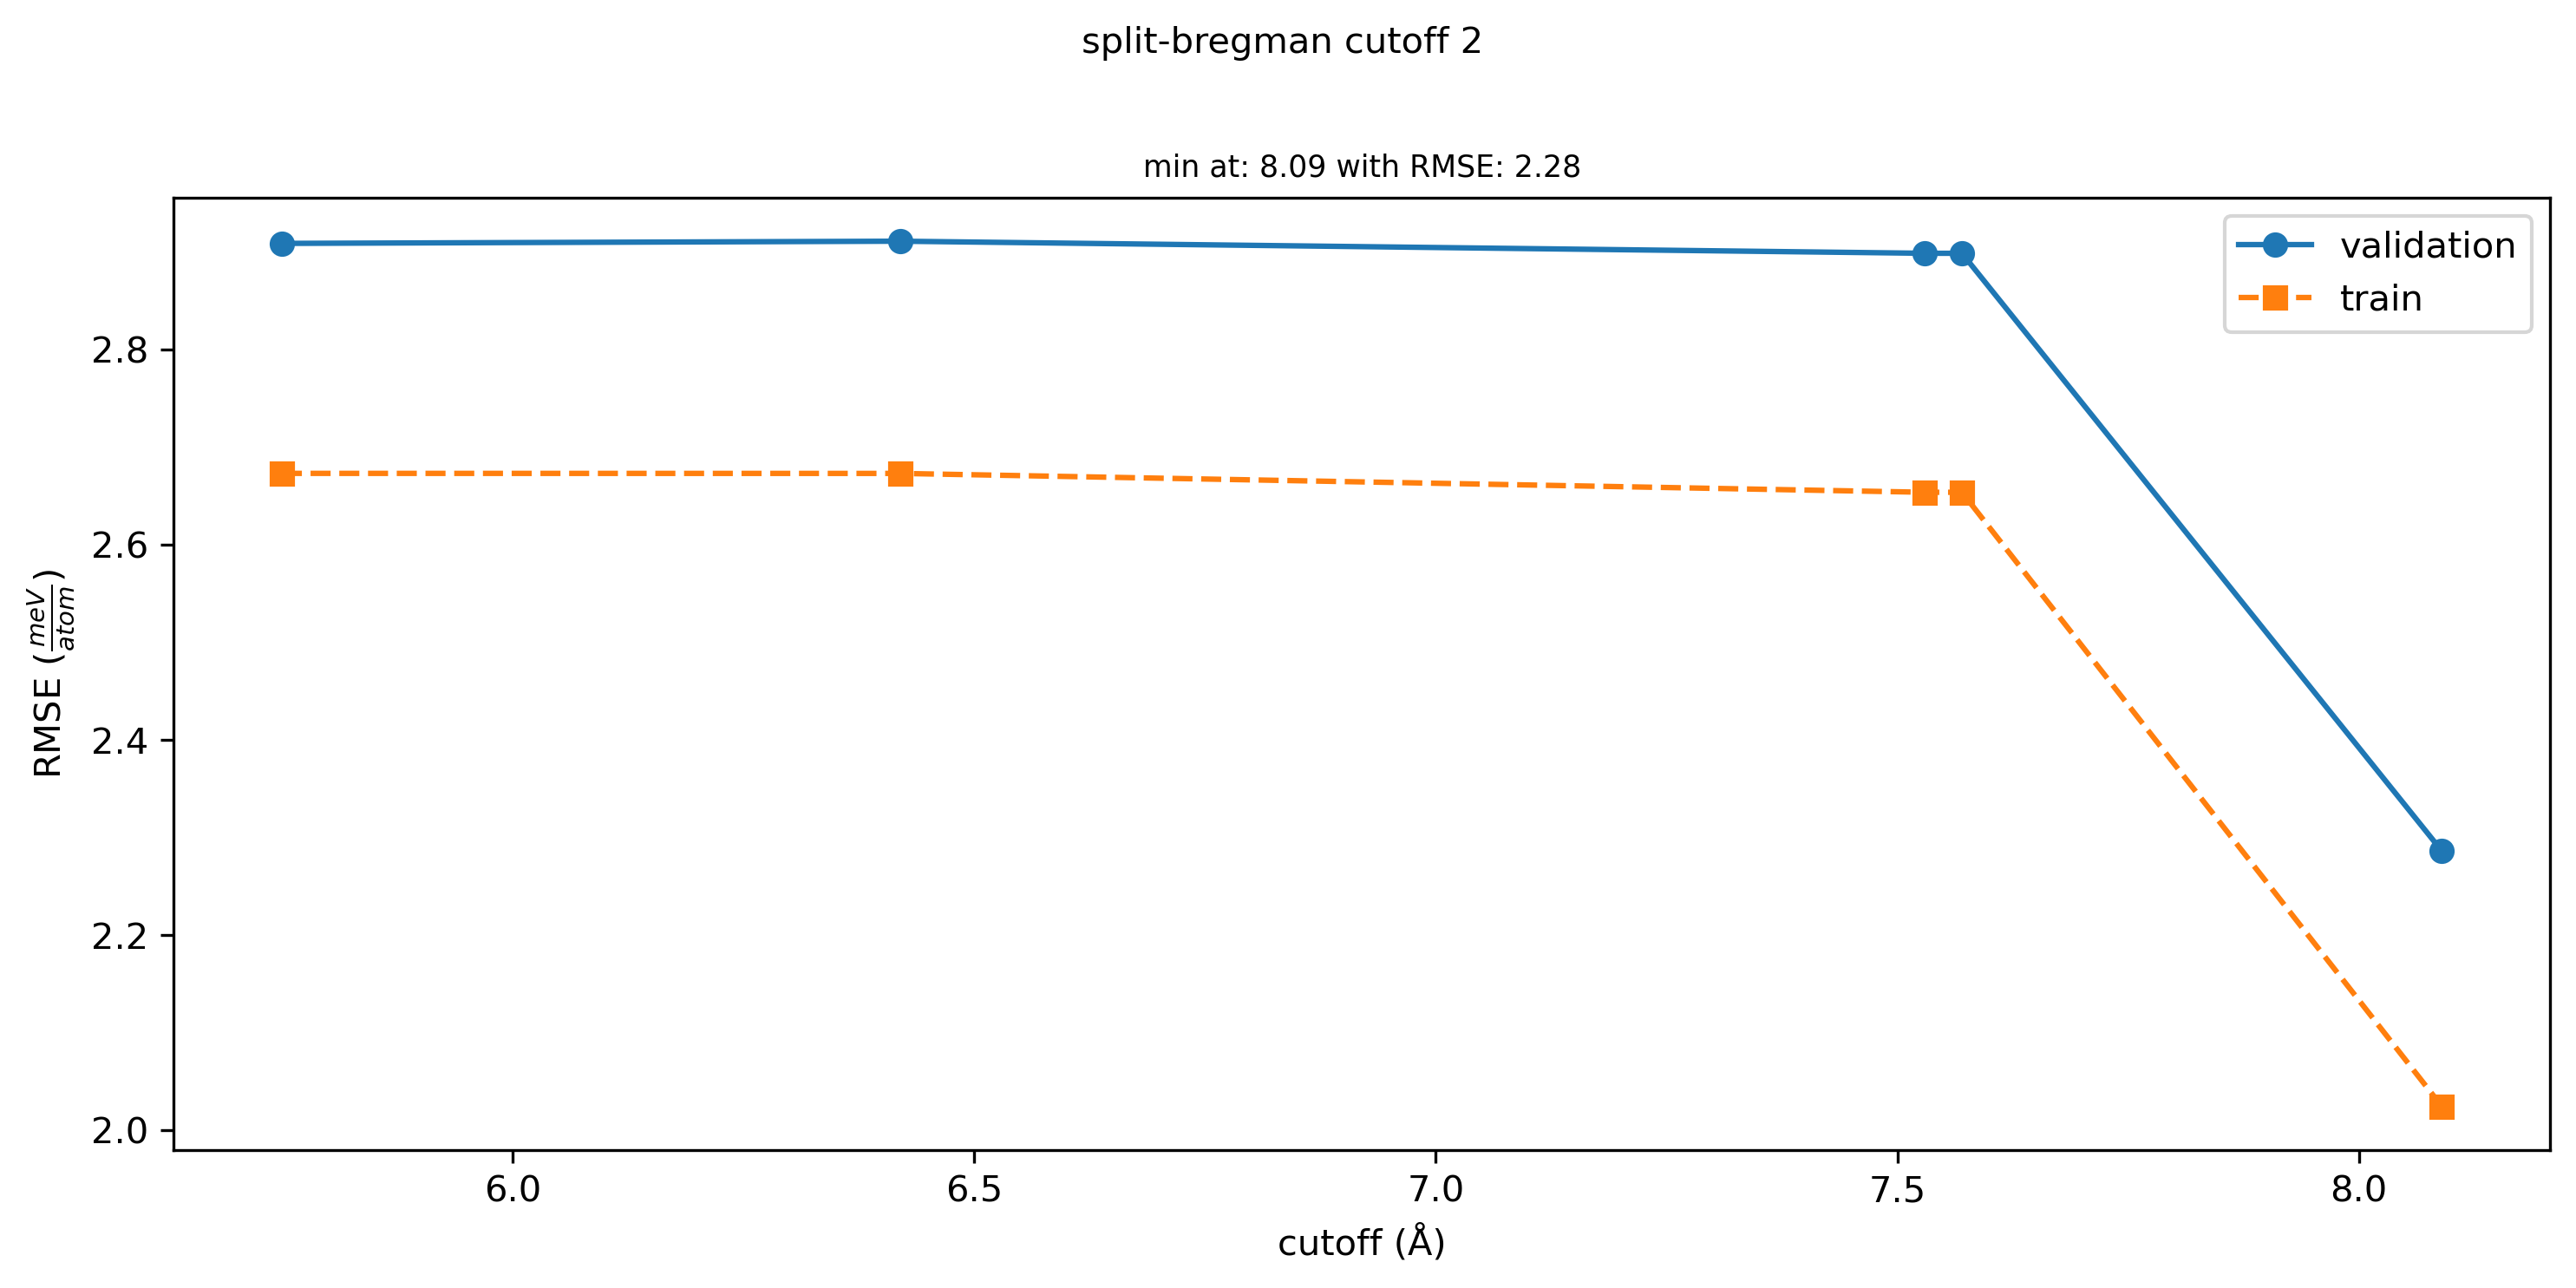

In [6]:
conv = 1000

for fit_method in fit_methods:
    df = pd.DataFrame(data[fit_method])

    fig, axes = plt.subplots(figsize=(10, 5), dpi=300, sharex=True, nrows=1)
    ax = axes

    fig.suptitle(f'{fit_method} cutoff {cutoff_kind} \n ', size='medium')
    ax.set_title(f'min at: {df.cutoff[df.validation.idxmin()]} with RMSE: {str(df.validation.min()*conv)[:4]}', size='small')

    ax.plot(df.cutoff, conv * df.validation, '-o', label='validation')
    ax.plot(df.cutoff, conv * df.train, '--s', label='train')
    ax.set_ylabel(r'RMSE ($\frac{meV}{atom}$)')
    ax.set_xlabel('cutoff (Å)')
    ax.legend()

    fig.tight_layout()
    fig.subplots_adjust(hspace=0)
    fig.align_ylabels(axes)

    fig.savefig(f'/nfshome/winkelmann/ARL/save/{model_name}TS_data/cutoff_{model_name}TS_png_plots/plot_cutoff_{cutoff_kind}_{fit_method}.png')


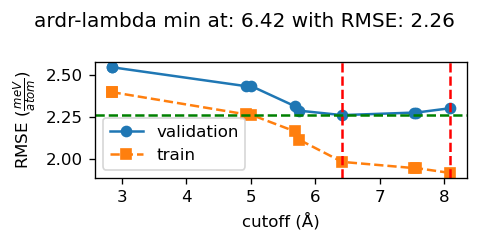

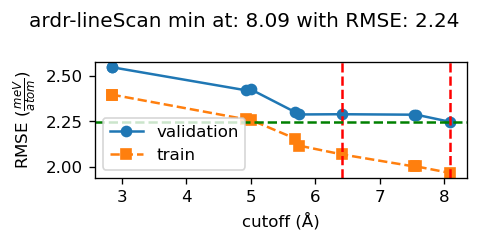

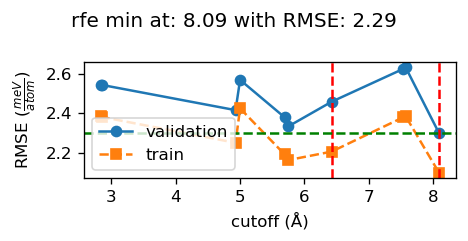

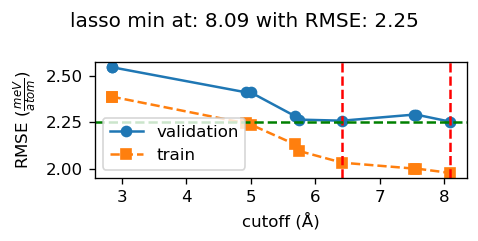

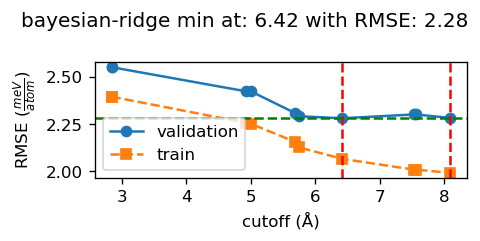

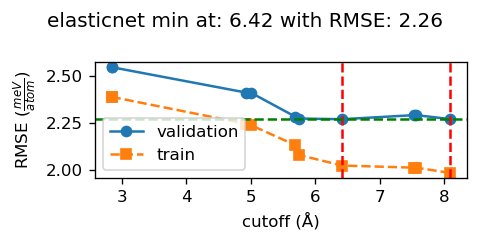

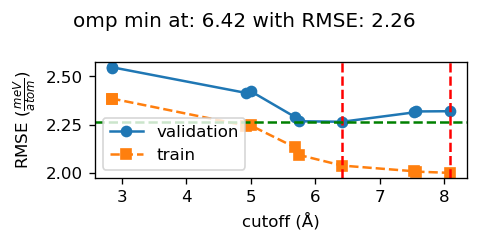

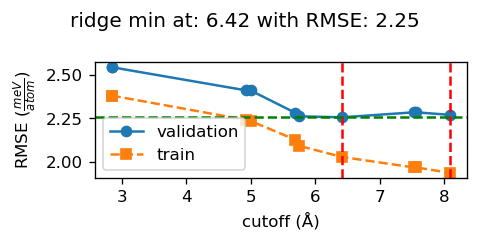

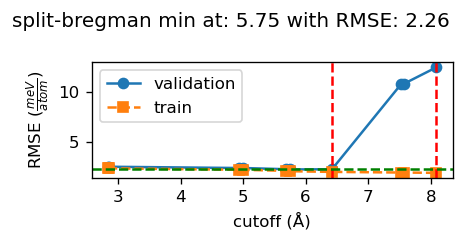

In [5]:
### with extra lines at specified values
conv = 1000

# justr the fit methods I want to fit
fit_methods = ['ardr-lambda', 'ardr-lineScan', 'rfe', 'lasso', 'bayesian-ridge', 'elasticnet', 'omp',
            'ridge', 'split-bregman']

for fit_method in fit_methods:
    df = pd.DataFrame(data[fit_method])

    fig, axes = plt.subplots(figsize=(4, 2), dpi=120, sharex=True, nrows=1)

    fig.suptitle('%s min at: %s with RMSE: %.4s' %(fit_method, df.cutoff[df.validation.idxmin()], df.validation.min()*conv))

    ax = axes
    ax.plot(df.cutoff, conv * df.validation, '-o', label='validation')
    ax.plot(df.cutoff, conv * df.train, '--s', label='train')
    ax.set_ylabel(r'RMSE ($\frac{meV}{atom}$)')
    ax.set_xlabel('cutoff (Å)')
    ax.legend()

    # extra lines
    ax.axvline(x=6.42, color='r', linestyle='--', label='c2')
    ax.axvline(x=8.09, color='r', linestyle='--', label='c2')
    ax.axhline(y=df.validation.min()*conv, color='g', linestyle='--')


    fig.tight_layout()
    fig.subplots_adjust(hspace=0)
    fig.align_ylabels(axes)

    fig.savefig(
        '/nfshome/winkelmann/ARL/save/titanTS_data/cutoff_titanTS_png_plots/plot_cutoff_3_%s_extra-lines.png' % (fit_method))

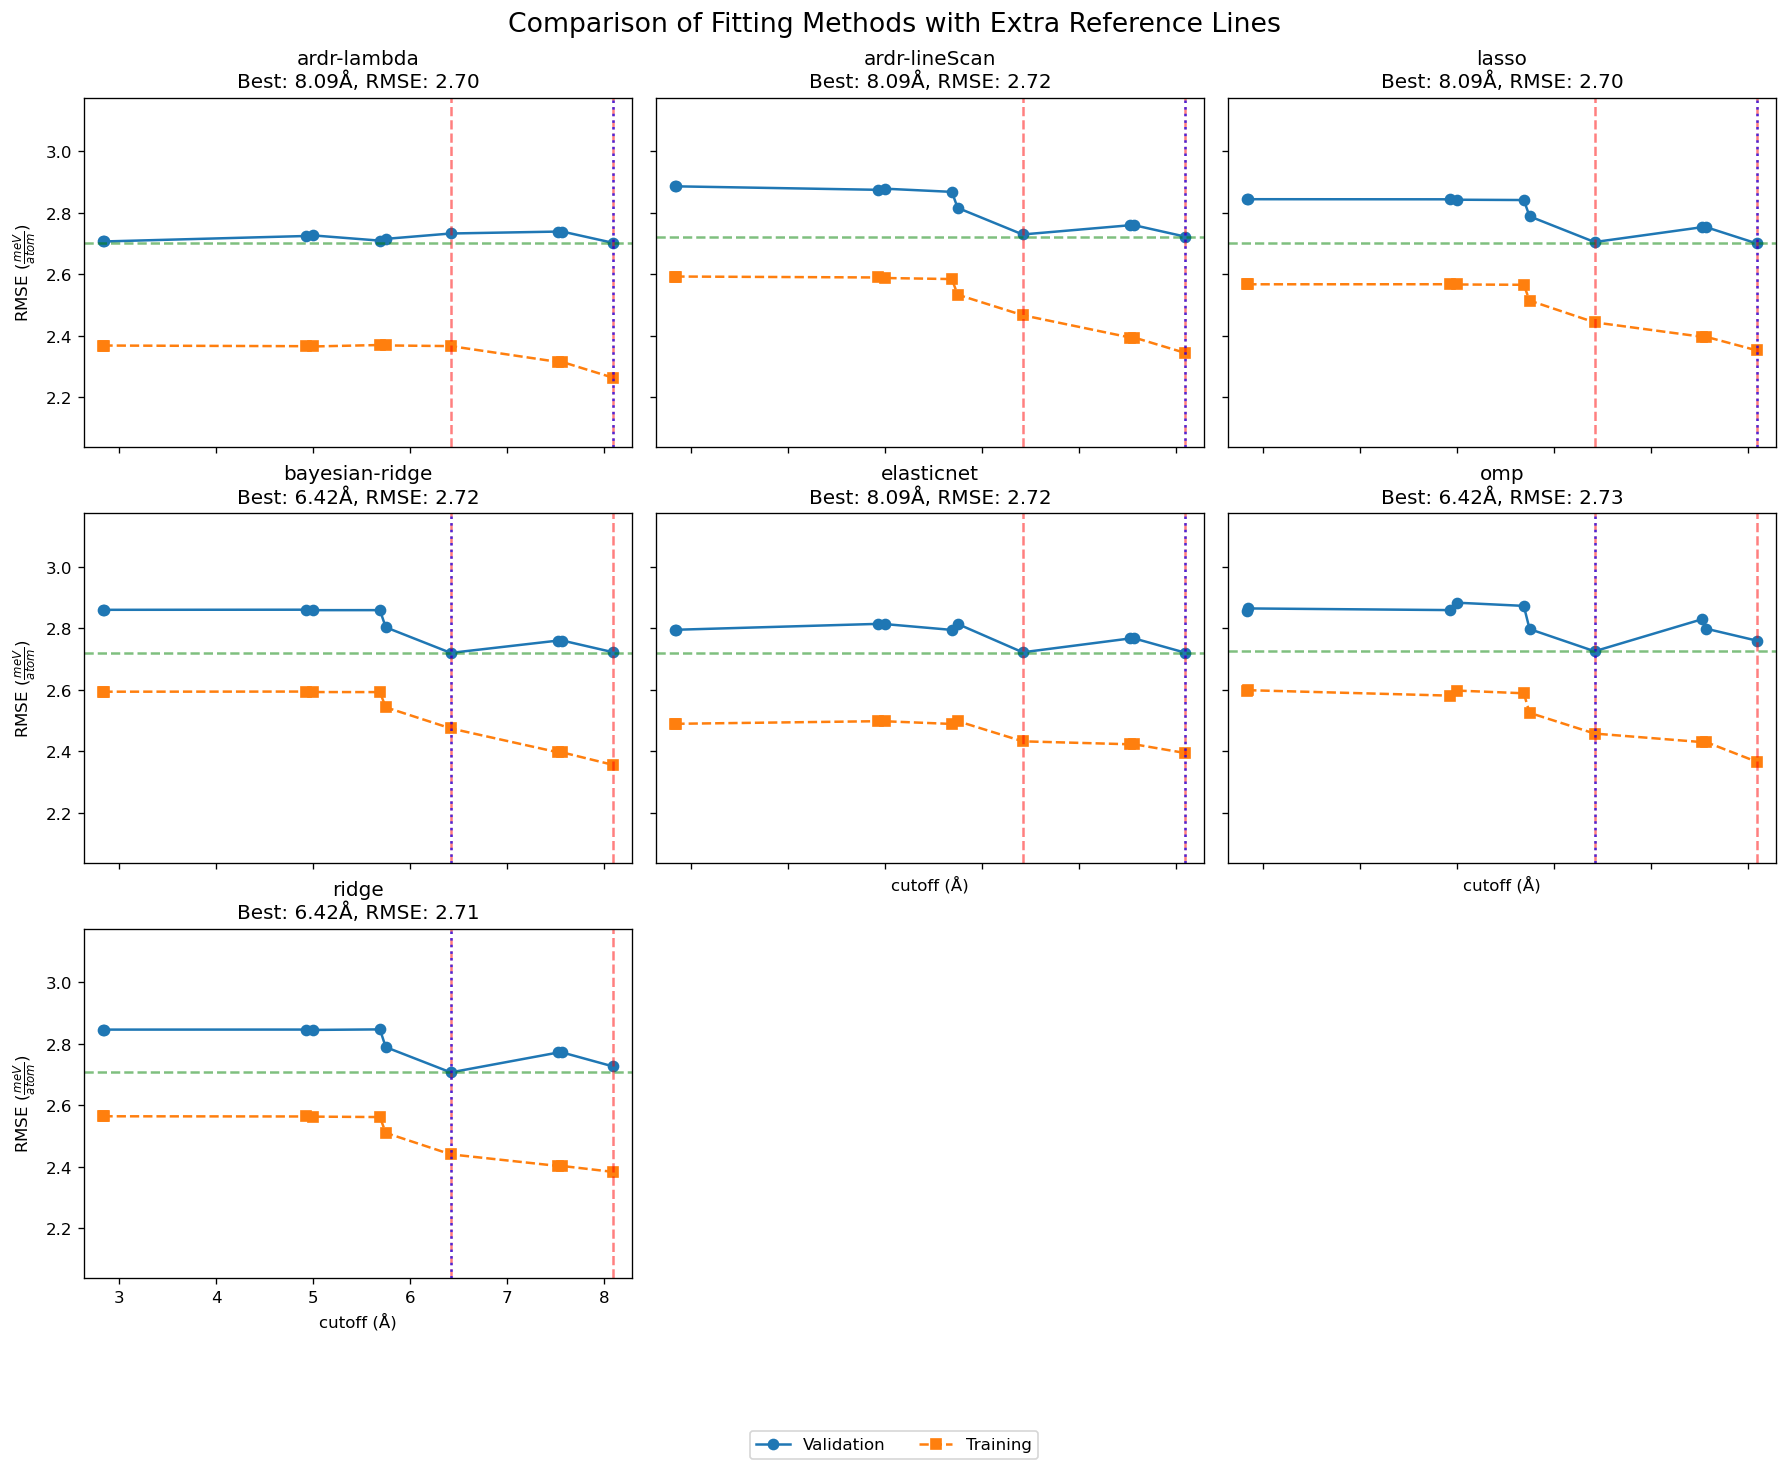

In [8]:
# Create a single figure with shared axes for all fit methods
conv = 1000

# justr the fit methods I want to fit
fit_methods = ['ardr-lambda', 'ardr-lineScan', 'lasso', 'bayesian-ridge', 'elasticnet', 'omp',
            'ridge']

# Determine global min/max for consistent axis scaling
all_validation_values = []
all_train_values = []
all_cutoffs = []

for fit_method in fit_methods:
    df = pd.DataFrame(data[fit_method])
    all_validation_values.extend(df['validation'] * conv)
    all_train_values.extend(df['train'] * conv)
    all_cutoffs.extend(df['cutoff'])

y_min = min(min(all_validation_values), min(all_train_values)) * 0.9
y_max = max(max(all_validation_values), max(all_train_values)) * 1.1
x_min = min(all_cutoffs) - 0.2
x_max = max(all_cutoffs) + 0.2

# Calculate number of rows needed (maximum 3 plots per row)
num_methods = len(fit_methods)
num_cols = min(3, num_methods)
num_rows = (num_methods + num_cols - 1) // num_cols  # Ceiling division

# Create a figure with subplots - organizing methods in rows of 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(5*num_cols, 4*num_rows), dpi=120, 
                         sharex=True, sharey=True)

# Flatten axes array for easier indexing if there are multiple rows
axes_flat = axes.flatten() if num_rows > 1 or num_cols > 1 else [axes]

for i, fit_method in enumerate(fit_methods):
    df = pd.DataFrame(data[fit_method])
    ax = axes_flat[i]
    
    # Plot validation and training data
    ax.plot(df.cutoff, conv * df.validation, '-o', label='validation')
    ax.plot(df.cutoff, conv * df.train, '--s', label='train')
    
    # Add extra lines
    ax.axvline(x=6.42, color='r', linestyle='--', alpha=0.5)
    ax.axvline(x=8.09, color='r', linestyle='--', alpha=0.5)
    ax.axhline(y=df.validation.min()*conv, color='g', linestyle='--', alpha=0.5)
    
    # Add best cutoff point marker
    best_cutoff = df.cutoff[df.validation.idxmin()]
    ax.axvline(x=best_cutoff, color='blue', linestyle=':', alpha=0.7)
    
    # Set title and labels
    ax.set_title(f'{fit_method}\nBest: {best_cutoff:.2f}Å, RMSE: {df.validation.min()*conv:.2f}')
    
    # Set y-label for the first subplot in each row
    if i % num_cols == 0:
        ax.set_ylabel(r'RMSE ($\frac{meV}{atom}$)')
    
    # Set x-label for all subplots in the bottom row
    if i >= num_methods - num_cols or num_methods <= num_cols:
        ax.set_xlabel('cutoff (Å)')
    
    # Set axis limits
    ax.set_ylim(y_min, y_max)
    ax.set_xlim(x_min, x_max)

# Hide unused subplots if any
for i in range(num_methods, num_rows * num_cols):
    if i < len(axes_flat):
        axes_flat[i].set_visible(False)

# Create a single legend for the entire figure
handles, labels = axes_flat[0].get_legend_handles_labels()
legend_labels = ['Validation', 'Training', 'Reference Line (6.42Å)', 'Reference Line (8.09Å)', 'Min RMSE']
fig.legend(handles[:2], legend_labels[:2], loc='upper center', bbox_to_anchor=(0.5, 0), ncol=2)

# Adjust layout
plt.tight_layout()
fig.subplots_adjust(top=0.92, bottom=0.1)

# Add a common title
fig.suptitle('Comparison of Fitting Methods with Extra Reference Lines', fontsize=16, y=0.98)

# Save the figure
fig.savefig('/nfshome/winkelmann/ARL/save/titanTS_data/cutoff_titanTS_png_plots/all_methods_comparison.png', 
           dpi=300, bbox_inches='tight')
plt.show()

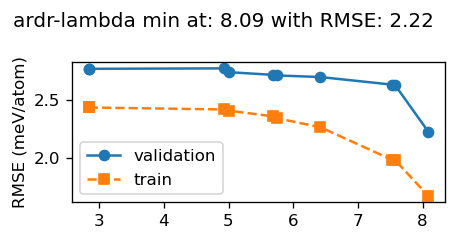

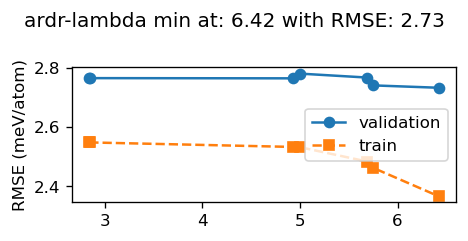

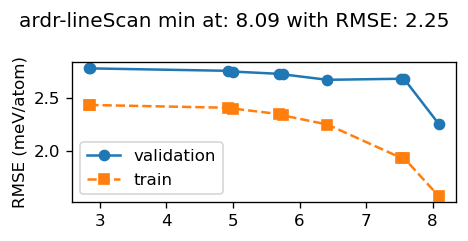

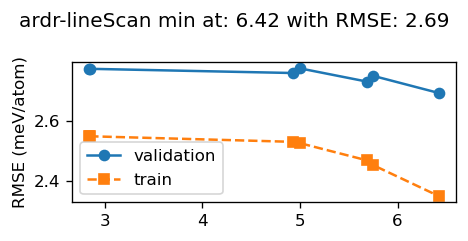

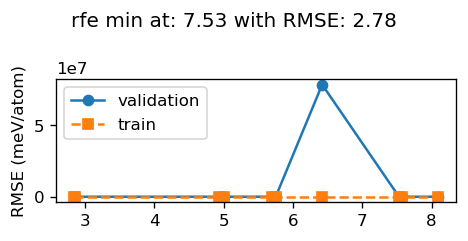

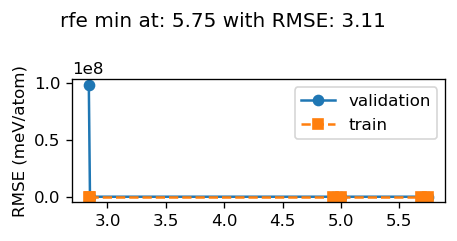

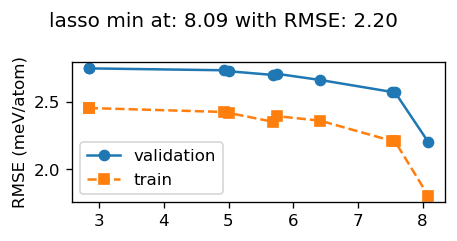

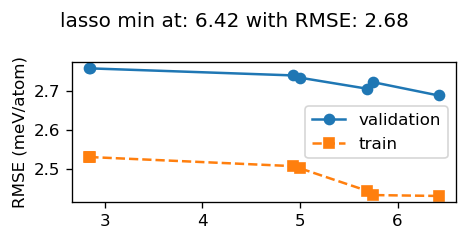

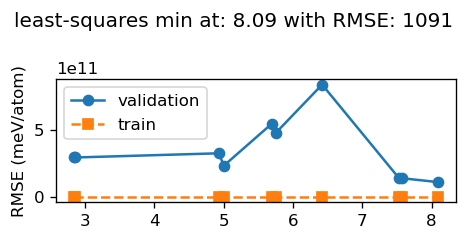

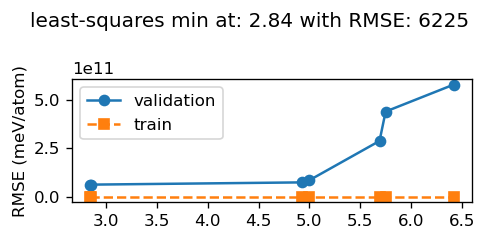

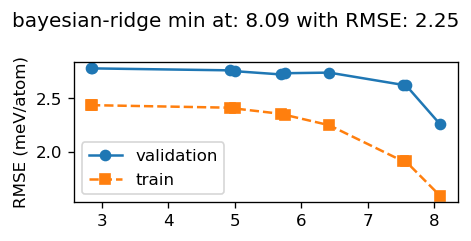

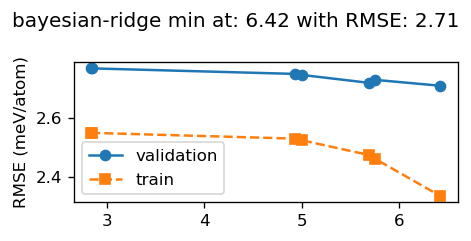

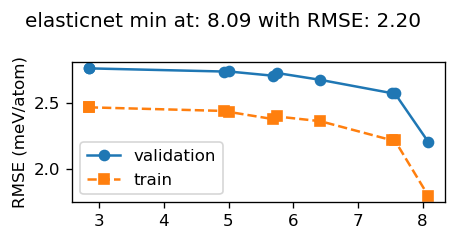

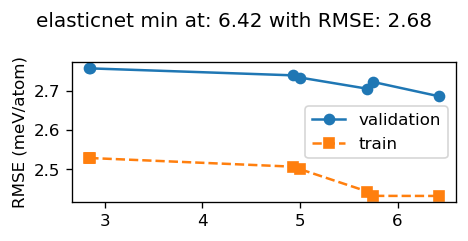

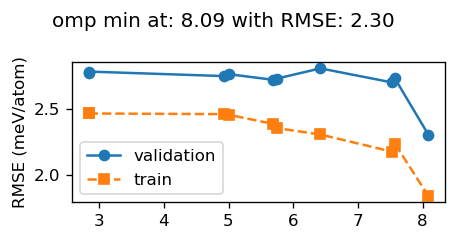

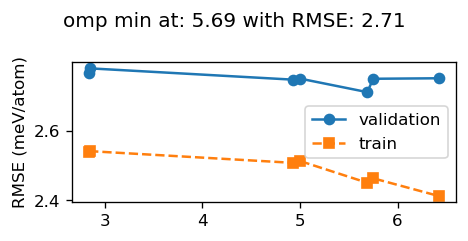

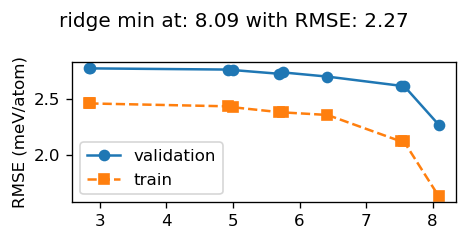

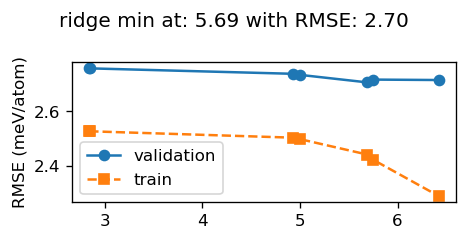

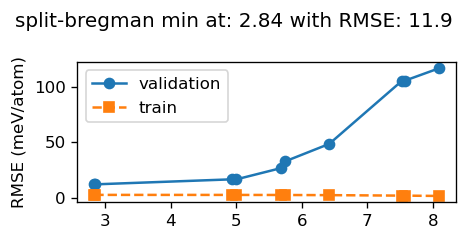

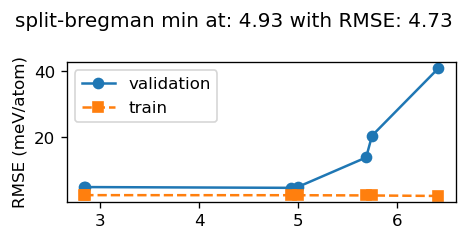

In [ ]:
#with cutoff subgroups
conv = 1000

fit_methods = ['ardr-lambda', 'ardr-lineScan', 'rfe', 'lasso', 'bayesian-ridge', 'elasticnet', 'omp',
               'ridge', 'split-bregman']

for fit_method in fit_methods:
    for cutoff_kind in lower_cutoff_groups:
        df = pd.DataFrame(data[cutoff_kind][fit_method])

        fig, axes = plt.subplots(figsize=(4, 2), dpi=120, sharex=True, nrows=1)

        fig.suptitle('%s with %s as cutoff 3; min at: %s with %s' % (
            fit_method, cutoff_kind, df.cutoff[df.validation.idxmin()], df.validation.min() * conv))

        ax = axes
        ax.plot(df.cutoff, conv * df.validation, '-o', label='validation')
        ax.plot(df.cutoff, conv * df.train, '--s', label='train')
        ax.set_ylabel(r'RMSE ($\frac{meV}{atom}$)')
        ax.set_xlabel('cutoff (Å)')
        ax.legend()

        fig.tight_layout()
        fig.subplots_adjust(hspace=0)
        fig.align_ylabels(axes)

        fig.savefig('/nfshome/winkelmann/ARL/save/titanTS_data/cutoff_titanTS_png_plots/plot_cutoff_4_%s_c3-%s.png' %(fit_method, cutoff_kind))

# Plot for TS cutoff data (ab c3)

In [ ]:
file = open('/nfshome/winkelmann/ARL/tmp/cutoffs_2_jochen_fit', 'r')  #edit for plotting over right cutoff
file.readline()
lines = file.readlines()
file.close()
fit_methods = ['ardr-lambda', 'ardr-lineScan', 'rfe', 'lasso', 'bayesian-ridge', 'elasticnet', 'omp',
               'ridge', 'split-bregman']
data = {}
    
for fit_method in fit_methods:
    data[fit_method] = {}
    for cutoff_kind in lower_cutoff_groups:
        data[fit_method][cutoff_kind] = {'cutoff': [], 'validation': [], 'train': [], 'BIC': [], 'number': [], 'nonzero': []}

for line in lines:
    line = line.replace(' ', '').replace('\t','').replace('\n','')
    line = line.split(',')
    if len(line) > 9:
        print(line[8] + ',' + str(line[0:8]))
        continue
    data[line[0]][line[1]]['cutoff'].append(float(line[2]))
    data[line[0]][line[1]]['validation'].append(float(line[3]))
    data[line[0]][line[1]]['train'].append(float(line[4]))
    data[line[0]][line[1]]['BIC'].append(float(line[5]))
    data[line[0]][line[1]]['number'].append(float(line[6]))
    data[line[0]][line[1]]['nonzero'].append(float(line[7]))